# "Insights from Stack Overflow Developers Annual Survey 2022"

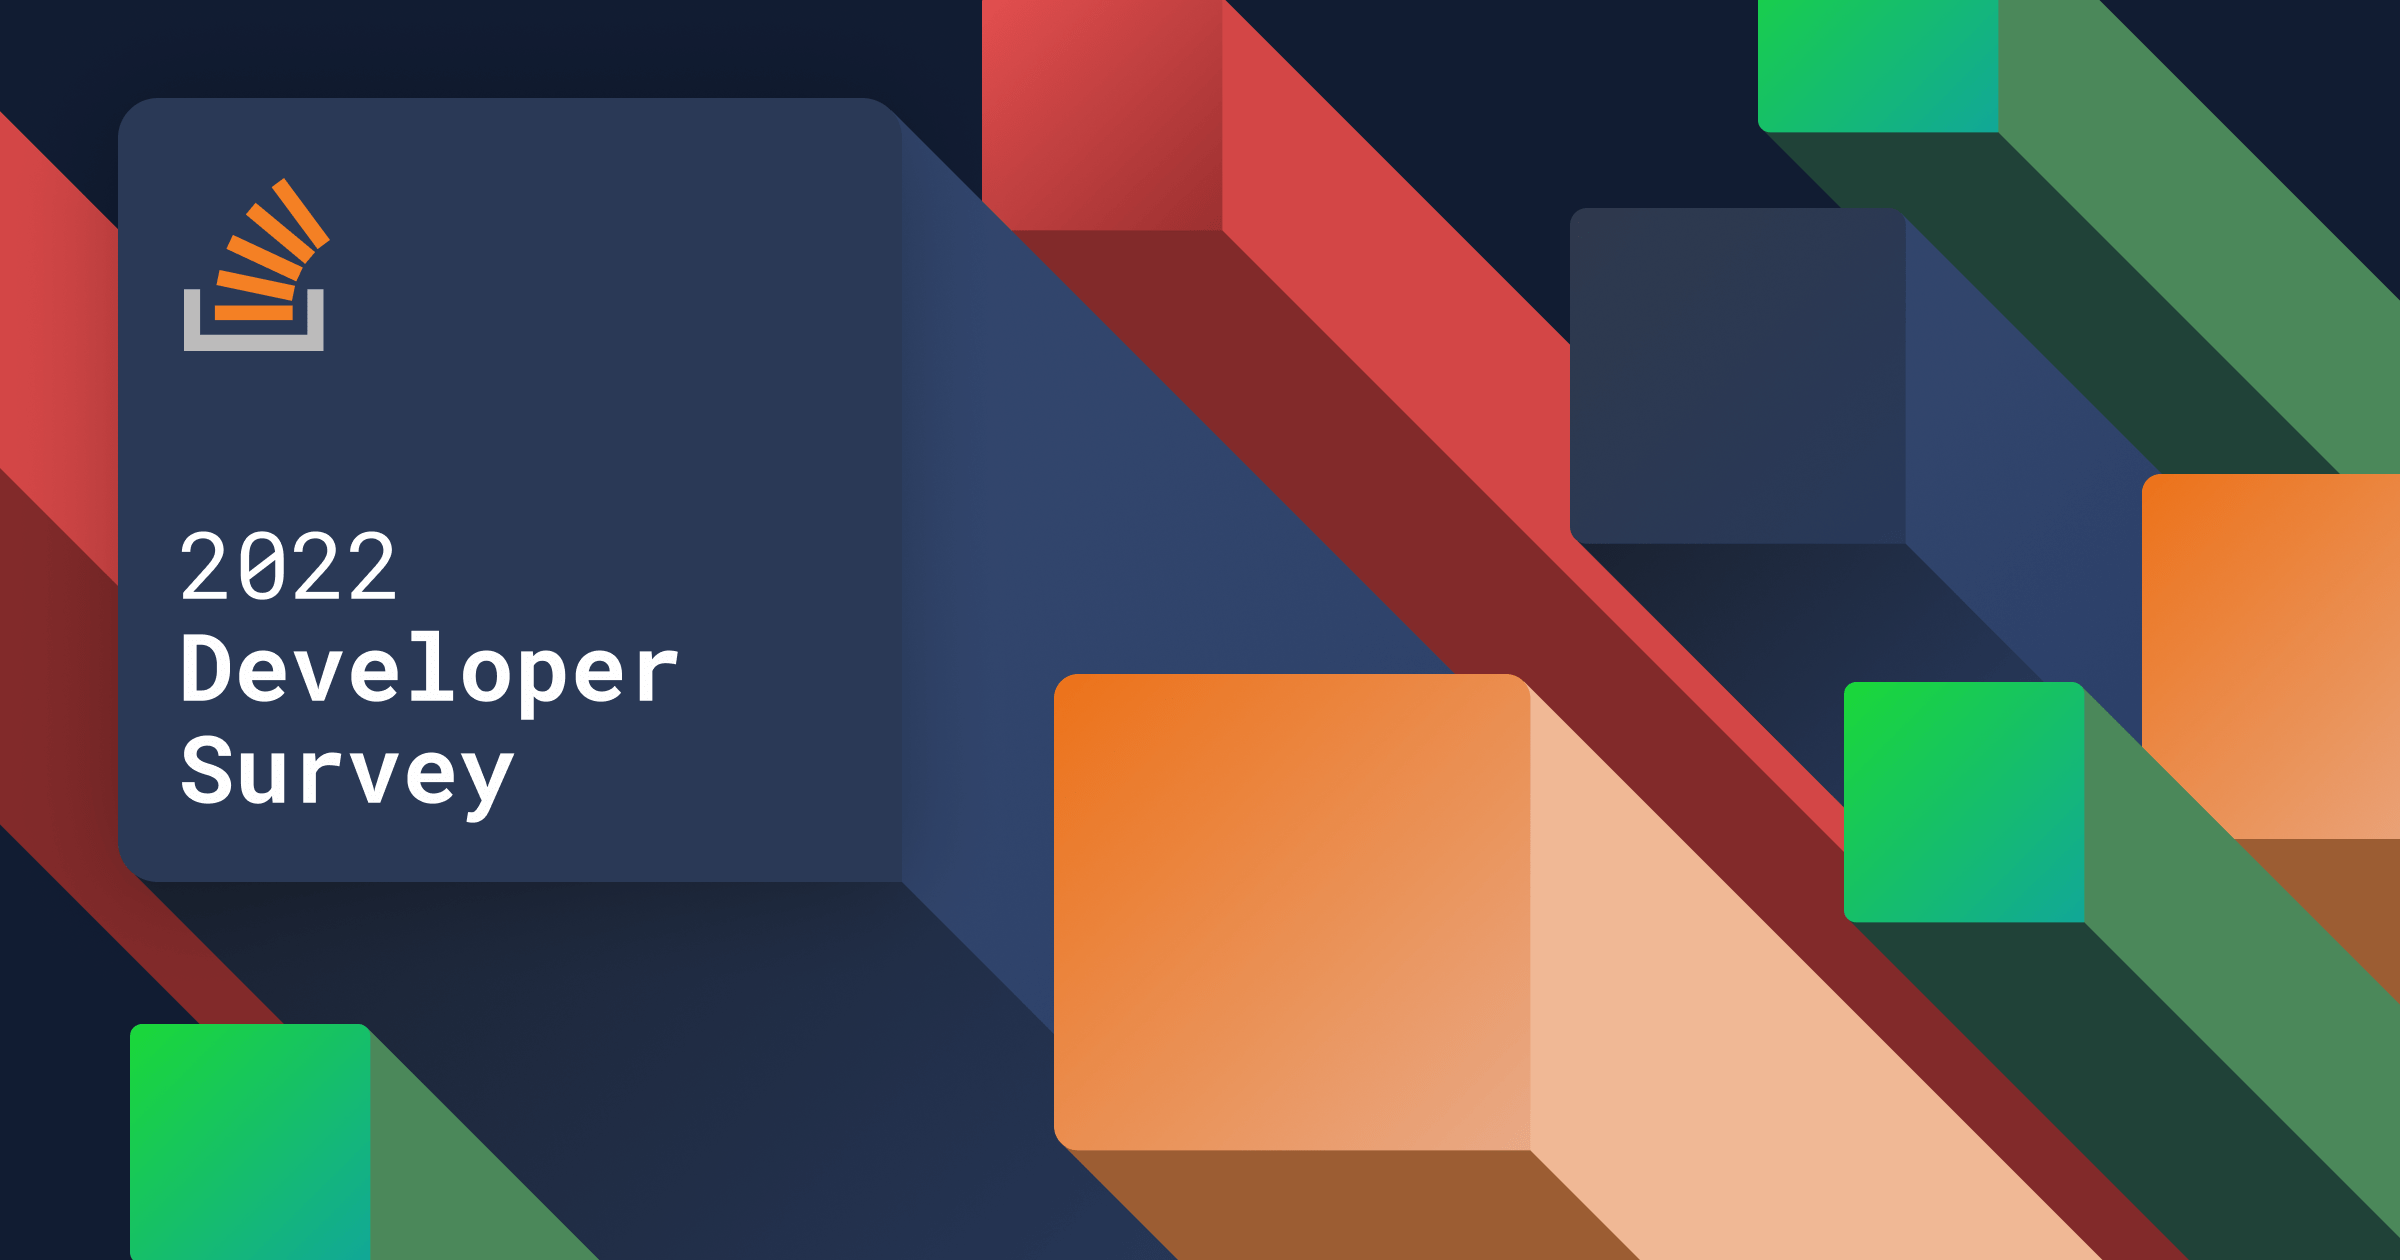

## Importing Necessary Libraries And Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("Stack Overflow Developers Annual Survey 2022.csv")
survey = pd.DataFrame(Data)
survey.shape

(73268, 79)

In [3]:
survey.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

## DATA PREPARATION AND CLEANING

In [4]:
seperated_columns = [
    # Demographic and Background Information
    'MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'YearsCode', 'YearsCodePro', 'OrgSize',
    'Country', 'Currency', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
    
    # Coding and Development
    'CodingActivities', 'DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
    'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
    
    # Salary and Compensation
    'CompTotal', 'CompFreq',

    # Mental Health and Well-being
    'MentalHealth'
]

In [5]:
len(seperated_columns)

31

In [6]:
survey_df = survey[seperated_columns].copy()

In [7]:
survey_df.head()

,MainBranch,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,Currency,Age,...,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,CompTotal,CompFreq,MentalHealth
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,"Employed, full-time",Fully remote,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,20 to 99 employees,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,25-34 years old,...,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,32000.0,Yearly,"I have a mood or emotional disorder (e.g., dep..."
3,I am a developer by profession,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,100 to 499 employees,Israel,ILS\tIsraeli new shekel,35-44 years old,...,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,60000.0,Monthly,None of the above
4,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,20 to 99 employees,United States of America,USD\tUnited States dollar,25-34 years old,...,Firebase;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js,Angular;ASP.NET Core ;Blazor;Node.js,.NET,.NET;Apache Kafka,npm,Docker;Kubernetes,NaN,NaN,NaN


In [8]:
survey_df.shape

(73268, 31)

In [9]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MainBranch               73268 non-null  object 
 1   Employment               71709 non-null  object 
 2   RemoteWork               58958 non-null  object 
 3   EdLevel                  71571 non-null  object 
 4   YearsCode                71331 non-null  object 
 5   YearsCodePro             51833 non-null  object 
 6   OrgSize                  51039 non-null  object 
 7   Country                  71771 non-null  object 
 8   Currency                 51264 non-null  object 
 9   Age                      70946 non-null  object 
 10  Gender                   70853 non-null  object 
 11  Trans                    70315 non-null  object 
 12  Sexuality                66565 non-null  object 
 13  Ethnicity                69474 non-null  object 
 14  CodingActivities      

In [10]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [11]:
survey_df["MainBranch"].isna().sum()

0

In [12]:
#check missing values
survey_df["MainBranch"].isna().sum()

0

No missing values found

In [13]:
survey_df["Employment"].isna().unique()

array([ True, False])

Here missing values found

In [14]:
survey_df['Employment'].value_counts()

Employed, full-time                                                                                                                    42962
Student, full-time                                                                                                                      6756
Independent contractor, freelancer, or self-employed                                                                                    4978
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                3486
Not employed, but looking for work                                                                                                      1831
                                                                                                                                       ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                                            1
Employed, ful

In [15]:
survey_df["Employment"] = survey_df["Employment"].fillna(value='Not_known')

In [16]:
survey_df['Employment'].isna().unique()

array([False])

filled with not known 

In [17]:
survey_df['RemoteWork'].isna().unique()

array([ True, False])

Here missing values found

In [18]:
survey_df["RemoteWork"].value_counts(dropna=False)

Fully remote                            25341
Hybrid (some remote, some in-person)    25021
NaN                                     14310
Full in-person                           8596
Name: RemoteWork, dtype: int64

In [19]:
survey_df["RemoteWork"]=survey_df["RemoteWork"].fillna(value="Fully remote")

In [20]:
survey_df["RemoteWork"].isna().unique()

array([False])

filled na with not known 

In [21]:
survey_df["EdLevel"].isna().unique()

array([ True, False])

Missing values found

In [22]:
survey_df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15486
Some college/university study without earning a degree                                 9326
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7904
Associate degree (A.A., A.S., etc.)                                                    2236
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2169
Primary/elementary school                                                              1806
Something else                                                                         1247
Professional degree (JD, MD, etc.)                                                     1121
Name: EdLevel, dtype: int64

In [23]:
survey_df['EdLevel'] = survey_df["EdLevel"].fillna(value = "Something else")

In [24]:
survey_df['EdLevel'].isna().unique()

array([False])

filled with Something else

In [25]:
survey_df["YearsCode"].isna().unique()

array([ True, False])

In [26]:
survey_df["YearsCode"].value_counts()

10.0    5217
5.0     5193
6.0     4651
4.0     4480
7.0     4237
8.0     4227
3.0     4122
2.0     3351
12.0    2995
15.0    2962
20.0    2659
9.0     2581
11.0    1819
14.0    1811
13.0    1624
25.0    1582
1.0     1566
16.0    1406
30.0    1330
22.0    1176
18.0    1150
17.0    1080
40.0     777
24.0     752
35.0     742
23.0     644
19.0     563
26.0     489
27.0     485
21.0     483
28.0     425
32.0     371
38.0     288
37.0     277
34.0     241
36.0     236
33.0     229
42.0     216
29.0     208
31.0     170
45.0     167
39.0     159
41.0     143
43.0     115
44.0     104
50.0      68
46.0      57
47.0      42
48.0      41
49.0      35
Name: YearsCode, dtype: int64

In [27]:
survey_df["YearsCode"]= survey_df['YearsCode'].fillna(value =12.403951 )

In [28]:
survey_df['YearsCode'].isna().unique()

array([False])

In [29]:
survey_df["YearsCodePro"].isna().unique()

array([ True, False])

In [30]:
survey_df["YearsCodePro"].value_counts()

3.0     4261
5.0     4057
2.0     3945
4.0     3884
10.0    3333
6.0     3184
7.0     2760
8.0     2646
1.0     2644
15.0    1822
12.0    1711
9.0     1583
20.0    1472
11.0    1369
14.0    1048
22.0     933
16.0     921
13.0     914
25.0     877
18.0     787
17.0     723
30.0     568
23.0     463
24.0     454
21.0     429
19.0     380
26.0     320
27.0     286
35.0     266
28.0     254
32.0     223
40.0     175
29.0     126
33.0     122
31.0     121
34.0     113
36.0     111
37.0     100
38.0      96
42.0      67
45.0      52
39.0      51
41.0      42
43.0      31
44.0      26
46.0      19
48.0      18
50.0      14
47.0      10
49.0       9
Name: YearsCodePro, dtype: int64

In [31]:
survey_df["YearsCodePro"] = survey_df["YearsCodePro"].fillna(value=10.268727)

In [32]:
survey_df["YearsCodePro"].isna().unique()

array([False])

In [33]:
survey_df["OrgSize"].isna().unique()

array([ True, False])

In [34]:
survey_df["OrgSize"].value_counts()

20 to 99 employees                                    10343
100 to 499 employees                                   9289
10,000 or more employees                               6922
1,000 to 4,999 employees                               5736
2 to 9 employees                                       4887
10 to 19 employees                                     4251
500 to 999 employees                                   3645
Just me - I am a freelancer, sole proprietor, etc.     2771
5,000 to 9,999 employees                               2189
I don’t know                                           1006
Name: OrgSize, dtype: int64

In [35]:
survey_df["OrgSize"] = survey_df["OrgSize"].fillna(value="I don’t know")

In [36]:
survey_df["Country"].isna().unique()

array([ True, False])

In [37]:
survey_df["Country"].value_counts()

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
                                                        ...  
Monaco                                                      1
Djibouti                                                    1
Seychelles                                                  1
Solomon Islands                                             1
Saint Kitts and Nevis                                       1
Name: Country, Length: 180, dtype: int64

In [38]:
survey_df["Country"] = survey_df["Country"].fillna(value="Not_known")

In [39]:
survey_df["Currency"].value_counts(dropna=False)

NaN                           22004
EUR European Euro             12634
USD\tUnited States dollar     12346
INR\tIndian rupee              4229
GBP\tPound sterling            3318
                              ...  
SHP\tSaint Helena pound           1
CVE\tCape Verdean escudo          1
KYD\tCayman Islands dollar        1
LAK\tLao kip                      1
TOP\tTongan pa’anga               1
Name: Currency, Length: 143, dtype: int64

In [40]:
survey_df["Currency"] = survey_df["Currency"].fillna(value="Not_known")

In [41]:
survey_df["Age"].value_counts(dropna=False)

25-34 years old       28112
18-24 years old       16646
35-44 years old       13988
45-54 years old        5281
Under 18 years old     3866
NaN                    2322
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Name: Age, dtype: int64

In [42]:
survey_df["Age"] =survey_df['Age'].fillna(value="Prefer not to say")

In [43]:
survey_df["Gender"].value_counts(dropna=False)

Man                                                                                   64607
Woman                                                                                  3399
NaN                                                                                    2415
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                       

In [44]:
survey_df["Gender"] =survey_df['Gender'].fillna(value="Prefer not to say")

In [45]:
survey_df['Trans'].value_counts(dropna=False)

No                        67392
NaN                        2953
Prefer not to say          1379
Yes                        1064
Or, in your own words:      480
Name: Trans, dtype: int64

In [46]:
survey_df["Trans"] =survey_df['Trans'].fillna(value="Prefer not to say")

In [47]:
survey_df['Ethnicity'].value_counts(dropna= False)

European                                             14612
White                                                13633
White;European                                        8694
Indian                                                5240
NaN                                                   3794
                                                     ...  
Indian;European;African;Multiracial                      1
Asian;East Asian;Southeast Asian;Pacific Islander        1
Middle Eastern;Asian;Multiracial;Biracial                1
Or, in your own words:;European;Asian                    1
White;European;North African;Hispanic or Latino/a        1
Name: Ethnicity, Length: 1056, dtype: int64

In [48]:
survey_df["Ethnicity"] = survey_df["Ethnicity"].fillna(value='Prefer not to say')

In [49]:
survey_df["Sexuality"].value_counts(dropna=False)

Straight / Heterosexual                                                           55238
NaN                                                                                6703
Prefer not to say                                                                  4350
Bisexual                                                                           2700
Gay or Lesbian                                                                     1382
Prefer to self-describe:                                                           1079
Queer                                                                               394
Bisexual;Straight / Heterosexual                                                    354
Bisexual;Queer                                                                      282
Straight / Heterosexual;Prefer to self-describe:                                    169
Gay or Lesbian;Queer                                                                150
Straight / Heterosexual;Queer   

In [50]:
survey_df["Sexuality"] = survey_df["Sexuality"].fillna(value='Prefer not to say')

In [51]:
survey_df[['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'YearsCode', 'YearsCodePro', 'OrgSize',
    'Country', 'Currency', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MainBranch    73268 non-null  object 
 1   Employment    73268 non-null  object 
 2   RemoteWork    73268 non-null  object 
 3   EdLevel       73268 non-null  object 
 4   YearsCode     73268 non-null  float64
 5   YearsCodePro  73268 non-null  float64
 6   OrgSize       73268 non-null  object 
 7   Country       73268 non-null  object 
 8   Currency      73268 non-null  object 
 9   Age           73268 non-null  object 
 10  Gender        73268 non-null  object 
 11  Trans         73268 non-null  object 
 12  Sexuality     73268 non-null  object 
 13  Ethnicity     73268 non-null  object 
dtypes: float64(2), object(12)
memory usage: 7.8+ MB


#all demographies missing values is managed

In [52]:
survey_df[['CodingActivities', 'DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
    'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith']] = survey_df[['CodingActivities', 'DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
    'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith']].fillna(value="NotKnown")

In [53]:
survey_df[['CodingActivities', 'DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
    'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CodingActivities         73268 non-null  object
 1   DevType                  73268 non-null  object
 2   LanguageHaveWorkedWith   73268 non-null  object
 3   LanguageWantToWorkWith   73268 non-null  object
 4   DatabaseHaveWorkedWith   73268 non-null  object
 5   DatabaseWantToWorkWith   73268 non-null  object
 6   PlatformHaveWorkedWith   73268 non-null  object
 7   PlatformWantToWorkWith   73268 non-null  object
 8   WebframeHaveWorkedWith   73268 non-null  object
 9   WebframeWantToWorkWith   73268 non-null  object
 10  MiscTechHaveWorkedWith   73268 non-null  object
 11  MiscTechWantToWorkWith   73268 non-null  object
 12  ToolsTechHaveWorkedWith  73268 non-null  object
 13  ToolsTechWantToWorkWith  73268 non-null  object
dtypes: object(14)
memory usage: 7.8+ MB


Coding and Development missing values managed

In [54]:
survey_df['CompTotal'].median()

77500.0

In [55]:
survey_df["CompTotal"].value_counts(dropna=False)

NaN          34846
100000.0       980
150000.0       789
60000.0        752
120000.0       745
             ...  
3330.0           1
8700000.0        1
517500.0         1
1353.0           1
439000.0         1
Name: CompTotal, Length: 3180, dtype: int64

In [56]:
survey_df['CompTotal'] =survey_df['CompTotal'].fillna(value = 77500.0)

In [57]:
survey_df['CompTotal'].value_counts()

77500.0     34852
100000.0      980
150000.0      789
60000.0       752
120000.0      745
            ...  
55770.0         1
20664.0         1
1631.0          1
29970.0         1
439000.0        1
Name: CompTotal, Length: 3179, dtype: int64

In [58]:
survey_df["CompFreq"].value_counts(dropna=False)

NaN        28843
Yearly     23267
Monthly    19983
Weekly      1175
Name: CompFreq, dtype: int64

In [59]:
survey_df["CompFreq"] =survey_df["CompFreq"].fillna(value= "Notknown")

In [60]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MainBranch               73268 non-null  object 
 1   Employment               73268 non-null  object 
 2   RemoteWork               73268 non-null  object 
 3   EdLevel                  73268 non-null  object 
 4   YearsCode                73268 non-null  float64
 5   YearsCodePro             73268 non-null  float64
 6   OrgSize                  73268 non-null  object 
 7   Country                  73268 non-null  object 
 8   Currency                 73268 non-null  object 
 9   Age                      73268 non-null  object 
 10  Gender                   73268 non-null  object 
 11  Trans                    73268 non-null  object 
 12  Sexuality                73268 non-null  object 
 13  Ethnicity                73268 non-null  object 
 14  CodingActivities      

In [61]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MainBranch               73268 non-null  object 
 1   Employment               73268 non-null  object 
 2   RemoteWork               73268 non-null  object 
 3   EdLevel                  73268 non-null  object 
 4   YearsCode                73268 non-null  float64
 5   YearsCodePro             73268 non-null  float64
 6   OrgSize                  73268 non-null  object 
 7   Country                  73268 non-null  object 
 8   Currency                 73268 non-null  object 
 9   Age                      73268 non-null  object 
 10  Gender                   73268 non-null  object 
 11  Trans                    73268 non-null  object 
 12  Sexuality                73268 non-null  object 
 13  Ethnicity                73268 non-null  object 
 14  CodingActivities      

## DATA ANALYSIS AND VISUALISATION 

In [62]:
survey_df.describe()

,YearsCode,YearsCodePro,CompTotal
count,73268.000000,73268.000000,7.326800e+04
mean,12.403951,10.268727,1.228381e+52
std,9.486324,7.072406,3.324952e+54
min,1.000000,1.000000,0.000000e+00
25%,5.000000,5.000000,7.200000e+04
50%,10.000000,10.268727,7.750000e+04
75%,16.000000,10.268727,8.160000e+04
max,50.000000,50.000000,9.000000e+56


The dataset provides information on developers' coding experience (YearsCode), professional coding experience (YearsCodePro), and their reported compensation (CompTotal). Key observations include:

- **Coding Experience:**
  - The average coding experience is around 12.4 years, with a minimum of 1 year and a maximum of 50 years.
  - The majority of developers fall within the 5 to 16 years of coding experience range.

- **Professional Coding Experience:**
  - The average professional coding experience is approximately 10.27 years, with a minimum and maximum of 1 year and 50 years, respectively.
  - The dataset indicates that, on average, developers start their professional coding careers around the same time as their overall coding journey.

- **Compensation:**
  - The reported compensation values exhibit a wide range, with a mean of 1.23e+52 and a standard deviation of 3.32e+54. However, the minimum compensation is listed as 0, which may require further investigation or cleaning.
  - The 25th, 50th, and 75th percentiles suggest a concentration of compensation values around the range of 72,000 to 81,600.

It's essential to note potential outliers and further explore the distribution of compensation values, considering the large standard deviation. Additionally, addressing any data quality issues, such as zero values for compensation, is crucial for accurate analysis.


In [63]:
# select those columns which are datatype of object and most useful for analysis purpose..........
selected_columns = [
    'OrgSize', 
    'RemoteWork',
    'EdLevel', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'MainBranch', 'Employment', 'RemoteWork', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
    'CodingActivities', 'DevType','Country'
]

In [64]:
# let's check summary stats include = 'all' helps us to describe their counts, unique, top, freq
summary_stats = survey_df[selected_columns].describe(include = 'all')

In [65]:
summary_stats

,OrgSize,RemoteWork,EdLevel,LanguageHaveWorkedWith,LanguageWantToWorkWith,MainBranch,Employment,RemoteWork,Gender,Trans,Sexuality,Ethnicity,CodingActivities,DevType,Country
count,73268,73268,73268,73268,73268,73268,73268,73268,73268,73268,73268,73268,73268,73268,73268
unique,10,3,9,25069,23953,6,104,3,16,4,32,1055,64,9985,181
top,I don’t know,Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NotKnown,NotKnown,I am a developer by profession,"Employed, full-time",Fully remote,Man,No,Straight / Heterosexual,European,Hobby,NotKnown,United States of America
freq,23235,39651,30276,2293,6241,53507,42962,39651,64607,67392,55238,14612,18118,11966,13543


### Key Findings

1. **Organization Size (`OrgSize`):**
   - Most common response: "I don’t know."
   - 10 unique categories for organization size.

2. **Remote Work (`RemoteWork`):**
   - Significant remote work adoption (25341 out of 73268).
   - Fully remote work is prevalent.

3. **Education Level (`EdLevel`):**
   - Predominance of developers with a Bachelor’s degree (30276 out of 73268).
   - Nine unique education levels reported.

4. **Programming Languages Worked With (`LanguageHaveWorkedWith`):**
   - Vast array of languages (25069 unique entries).
   - "NotKnown" is a common response.

5. **Programming Languages Want to Work With (`LanguageWantToWorkWith`):**
   - Diverse preferences (23953 unique entries).
   - "NotKnown" prevalent, indicating uncertainty.

6. **Main Branch (`MainBranch`):**
   - Predominantly "I am a developer by profession."
   - Indicates a professional developer-oriented dataset.

7. **Employment Status (`Employment`):**
   - Majority employed full-time (42962 out of 73268).
   - "Employed, full-time" is most common.

8. **Gender:**
   - Gender imbalance (64607 men out of 73268).
   - "Man" is the most common gender.

9. **Transgender Status (`Trans`):**
   - Substantial number identify as transgender (14612 out of 73268).
   - "No" is the majority response.

10. **Sexuality:**
    - Diverse sexual orientations; "Straight / Heterosexual" is most common (55238 out of 73268).

11. **Ethnicity:**
    - "European" is the most common ethnicity.
    - 32 unique ethnicity categories.

12. **Coding Activities (`CodingActivities`):**
    - "Hobby" is the most common coding activity.
    - Indicates a significant number of developers code for leisure.

13. **Developer Type (`DevType`):**
    - Wide variety with 64 unique entries.
    - "NotKnown" suggests uncertainty about specific developer types.

14. **Country:**
    - Represented by respondents from 1055 unique countries.
    - The United States of America is the most common.

---

**Conclusion:**
The dataset portrays a diverse developer community with variations in organization size, remote work preferences, education levels, and demographics. "NotKnown" entries suggest some respondents are uncertain or choose not to disclose certain information. Findings provide valuable insights, indicating potential areas for further exploration and analysis.

### Univariate Analysis

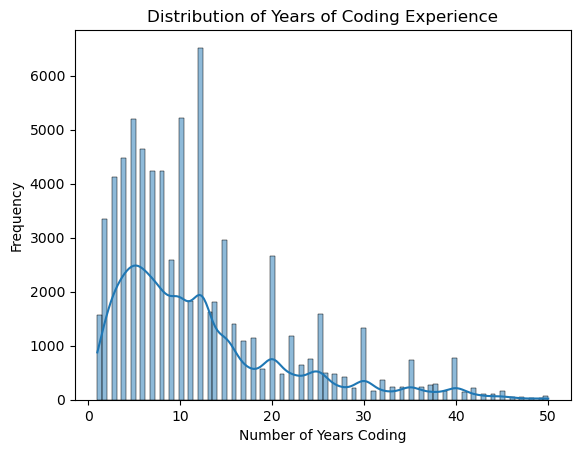

In [66]:
#plot the histogram to understand distribution
sns.histplot(survey_df['YearsCode'], kde = True)
# Set plot labels and title
plt.xlabel('Number of Years Coding')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Coding Experience')
#show the plot
plt.show()

The histogram depicting the distribution of coding experience among developers reveals a compelling pattern. Approximately 50% of developers showcase a coding experience of ten years or less, reflecting a substantial influx of individuals into the field in recent years. Notably, a remarkable segment of the developer population exhibits a wealth of experience, with some individuals boasting an impressive 50 years of coding expertise. This diverse distribution underscores the dynamic nature of the coding community, encompassing both emerging talent and seasoned professionals who have significantly contributed to the field over several decades. Such insights are invaluable for shaping informed decisions in areas like talent acquisition, community engagement, and the design of educational initiatives tailored to varying experience levels.

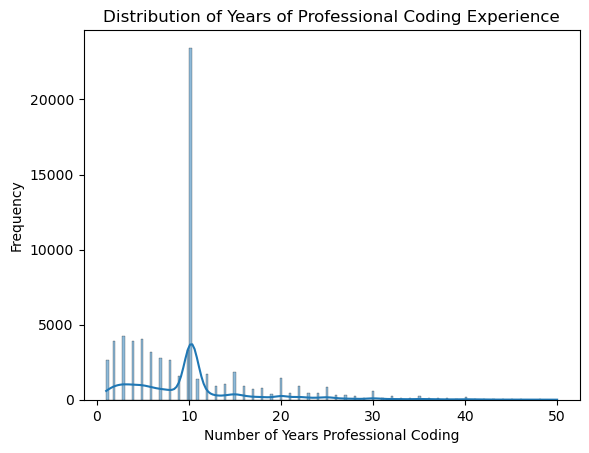

In [67]:
#plot the histogram to understand distribution
sns.histplot(survey_df['YearsCodePro'], kde = True)
# Set plot labels and title
plt.xlabel('Number of Years Professional Coding')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Professional Coding Experience')
#show the plot
plt.show()

The observed distribution of coding experience among developers exhibits characteristics reminiscent of a somewhat normal distribution. Notably, a significant majority of professional coders, totaling over 20,000 developers, have accumulated approximately 10 years of experience. This concentration in the 10-year range suggests a substantial cohort of seasoned professionals in the field.

Interestingly, a notable portion of younger talents is also evident, entering the professional coding arena with less experience. Simultaneously, it's intriguing to observe that a select group of individuals boasts an impressive 20 or more years of professional coding experience, indicating a sustained presence of seasoned experts. The presence of both emerging and highly experienced developers contributes to the dynamic and diverse landscape of the coding community.

These insights provide valuable context for understanding the career trajectories within the developer community, highlighting a balance between fresh talent and individuals with decades of professional coding expertise.


In [68]:
def identify_outliers(compensation):
    extreme = []
    mean_comp = compensation.mean()
    std_comp = compensation.std()
    
    for value in compensation:
        if value < (mean_comp - 3 * std_comp) or value > (mean_comp + 3 * std_comp):
            extreme.append(value)
    
    return extreme

outliers = identify_outliers(survey_df['CompTotal'])
outliers

[9e+56]

In [69]:
def identify_outliers(compensation):
    extreme_indices = []
    mean_comp = compensation.mean()
    std_comp = compensation.std()
    
    for index, value in enumerate(compensation):
        if value < (mean_comp - 3 * std_comp) or value > (mean_comp + 3 * std_comp):
            extreme_indices.append(index)
    
    return extreme_indices

outlier_indices = identify_outliers(survey_df['CompTotal'])
outlier_rows = survey_df.iloc[outlier_indices]

In [70]:
outlier_indices

[35786]

In [71]:
outlier_rows

,MainBranch,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,Currency,Age,...,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,CompTotal,CompFreq,MentalHealth
35786,I am a developer by profession,"Employed, full-time;Employed, part-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",4.0,16.0,"Just me - I am a freelancer, sole proprietor, ...",Ecuador,DOP\tDominican peso,65 years or older,...,Heroku,Angular,Blazor;Svelte,Scikit-learn,Tidyverse,Puppet,Yarn,9.000000e+56,Weekly,"I have a mood or emotional disorder (e.g., dep..."


In [72]:
#transpose column into rows for full understanding
outlier_rows_transposed = outlier_rows.transpose()
print(outlier_rows_transposed)

                                                                     35786
MainBranch                                  I am a developer by profession
Employment                         Employed, full-time;Employed, part-time
RemoteWork                            Hybrid (some remote, some in-person)
EdLevel                  Secondary school (e.g. American high school, G...
YearsCode                                                              4.0
YearsCodePro                                                          16.0
OrgSize                  Just me - I am a freelancer, sole proprietor, ...
Country                                                            Ecuador
Currency                                               DOP\tDominican peso
Age                                                      65 years or older
Gender                   Man;Woman;Non-binary, genderqueer, or gender n...
Trans                                                                   No
Sexuality                

Handling Outlier Using Winsorizing

In [73]:
## Winsorizing or Capping

# Assuming 'survey_df' is your DataFrame
comp_total_column = survey_df['CompTotal']

# Set values above the 99th percentile to the 99th percentile value
comp_total_column = np.where(comp_total_column > comp_total_column.quantile(0.99), comp_total_column.quantile(0.99), comp_total_column)

# Update the DataFrame with the Winsorized values
survey_df['CompTotal'] = comp_total_column

In [74]:
survey_df['CompTotal'].describe()

count    7.326800e+04
mean     2.412927e+05
std      9.343760e+05
min      0.000000e+00
25%      7.200000e+04
50%      7.750000e+04
75%      8.160000e+04
max      8.000000e+06
Name: CompTotal, dtype: float64

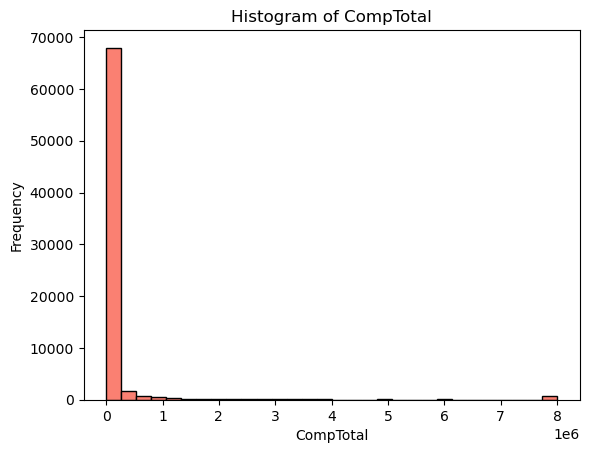

In [75]:
# Assuming 'survey_df' is your DataFrame
plt.hist(survey_df['CompTotal'].dropna(), bins=30, edgecolor='black', color = 'salmon')
plt.title('Histogram of CompTotal')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.show()

The histogram illustrates that approximately 50% of developers have a compensation level around 70,000. However, it is noteworthy that there is a minority of developers who earn in the six-figure range. This suggests a considerable variation in compensation within the developer community, with a subset of individuals commanding higher incomes exceeding the 100,000 mark. The distribution implies that while a significant portion falls within the 70,000 range, there exists a noteworthy group of developers earning higher salaries, contributing to the overall diversity in compensation within the profession.

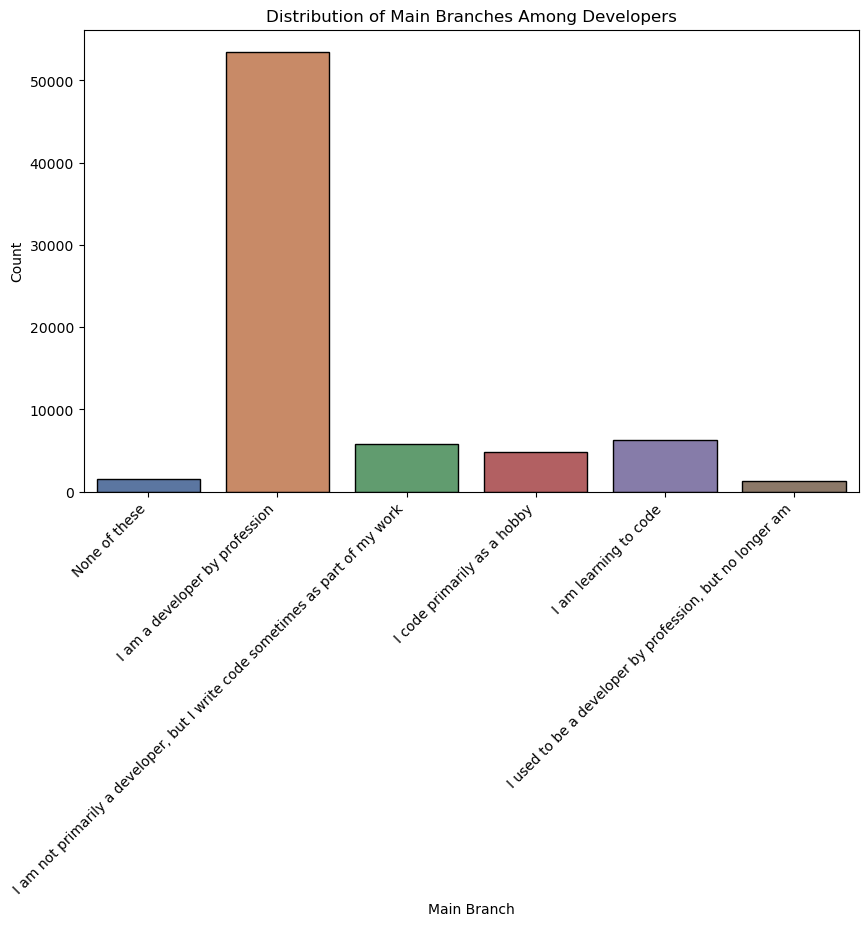

In [76]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='MainBranch', data=survey_df, palette='deep', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of Main Branches Among Developers')
plt.xlabel('Main Branch')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

More than half of the developers have developers by profession 

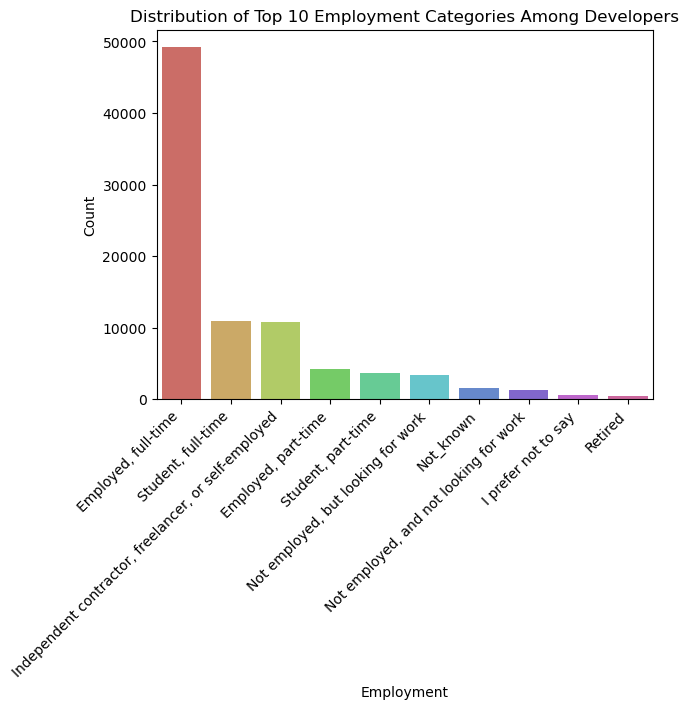

In [77]:
split = survey_df['Employment'].str.split(';').explode()
employee = split.unique()
counts = split.value_counts()
#plot the bargraph
sns.barplot(x = counts.index, y = counts.values, palette = 'hls')

# Adding labels and title
plt.title('Distribution of Top 10 Employment Categories Among Developers')
plt.xlabel('Employment')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

The barchart showcases diverse employment statuses among respondents:

1. The majority are employed full-time .
2. A significant number are full-time students .
3. Freelancers or self-employed individuals make up a notable portion.
4. A subset is actively job-seeking.

This diversity highlights the varied professional situations within the developer community, ranging from traditional full-time roles to freelancing, self-employment, and student engagements.

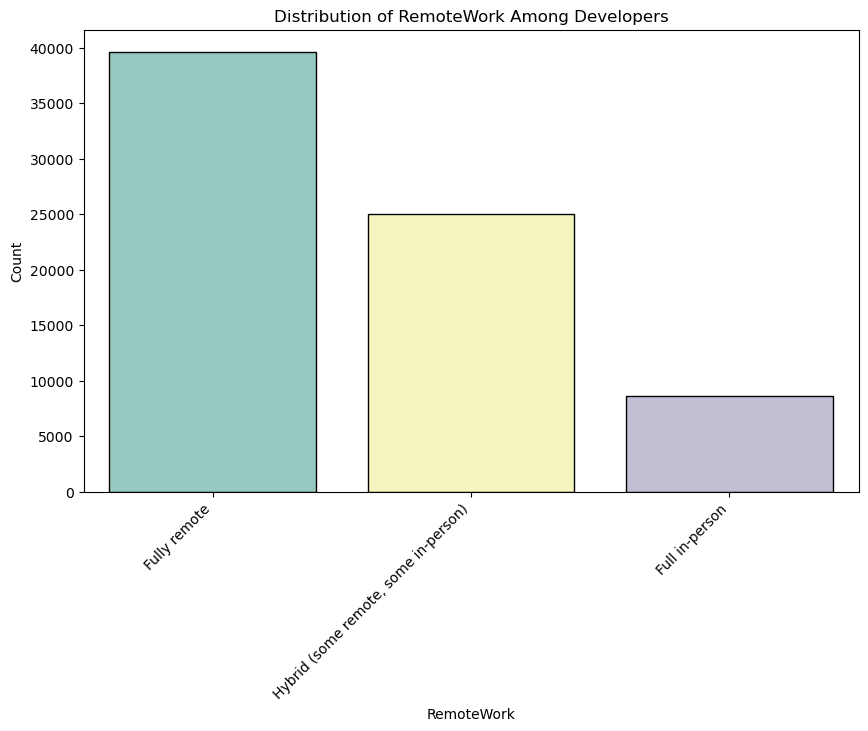

In [78]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='RemoteWork', data=survey_df, palette='Set3', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of RemoteWork Among Developers')
plt.xlabel('RemoteWork')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

"The bar chart illustrates a clear preference among developers for remote or hybrid work environments compared to full in-person arrangements. The majority of developers express a positive inclination towards working remotely, reflecting a trend in favor of flexible or hybrid work setups within the developer community."


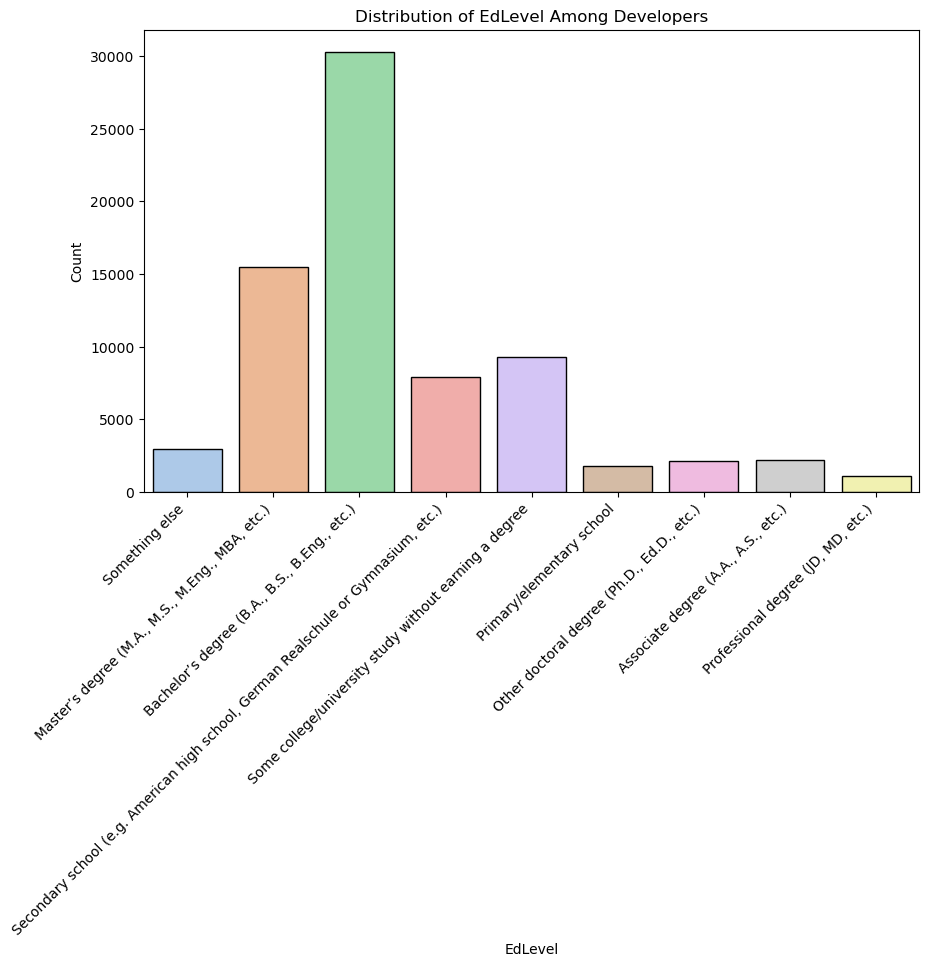

In [79]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='EdLevel', data=survey_df, palette='pastel', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of EdLevel Among Developers')
plt.xlabel('EdLevel')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

The data on developers' education levels indicates:

1. A significant majority have a Bachelor's degree (30,276).
2. There's a substantial presence of those with Master's degrees (15,486).
3. Diverse educational paths include some college/university study, secondary school, and associate degrees.
4. A notable number hold other advanced degrees (Ph.D., Ed.D.) and professional degrees (JD, MD).
5. Some developers have primary/elementary school education or non-traditional educational backgrounds.

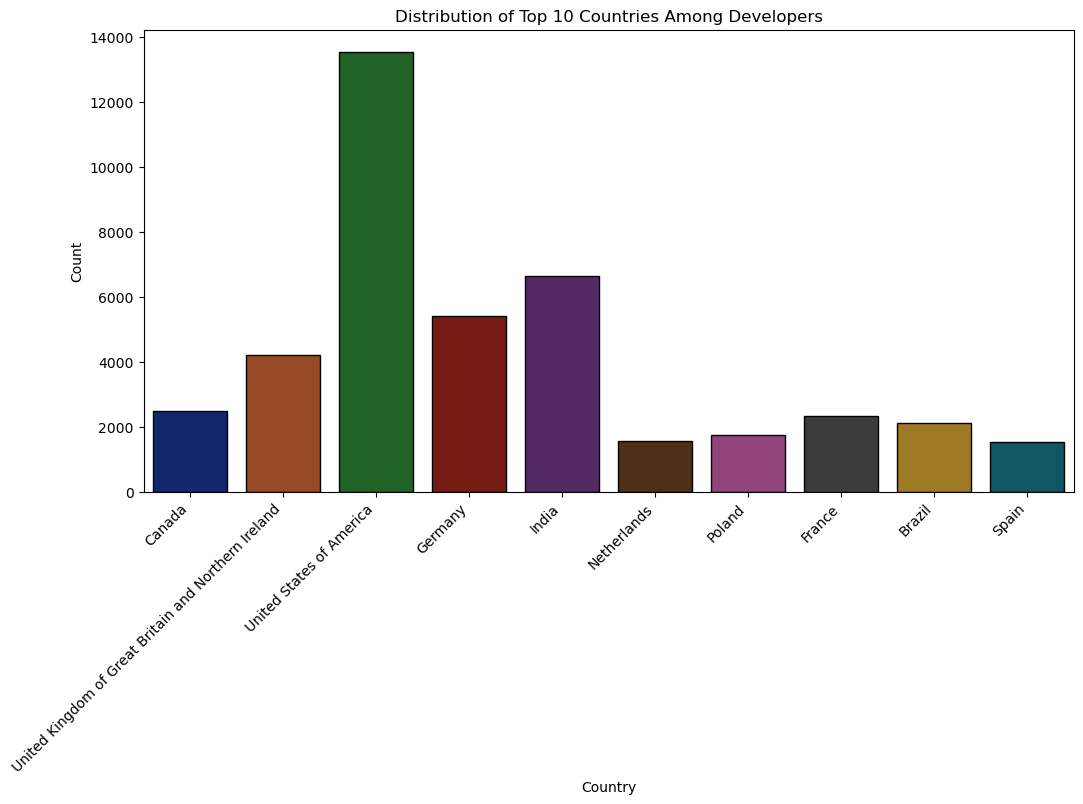

In [80]:
# Find the top 10 countries
top_10_countries = survey_df['Country'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 countries
filtered_df = survey_df[survey_df['Country'].isin(top_10_countries)]

# Plotting the bar chart for the top 10 countries
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=filtered_df, palette='dark', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of Top 10 Countries Among Developers')
plt.xlabel('Country')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

The barchart indicates:

1. The United States has the highest number of developers (13,543).
2. India follows closely with a substantial developer community (6,639).
3. Germany, the United Kingdom, and Canada also have notable developer representations.
4. The dataset reflects global diversity, including respondents from smaller countries with fewer participants.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


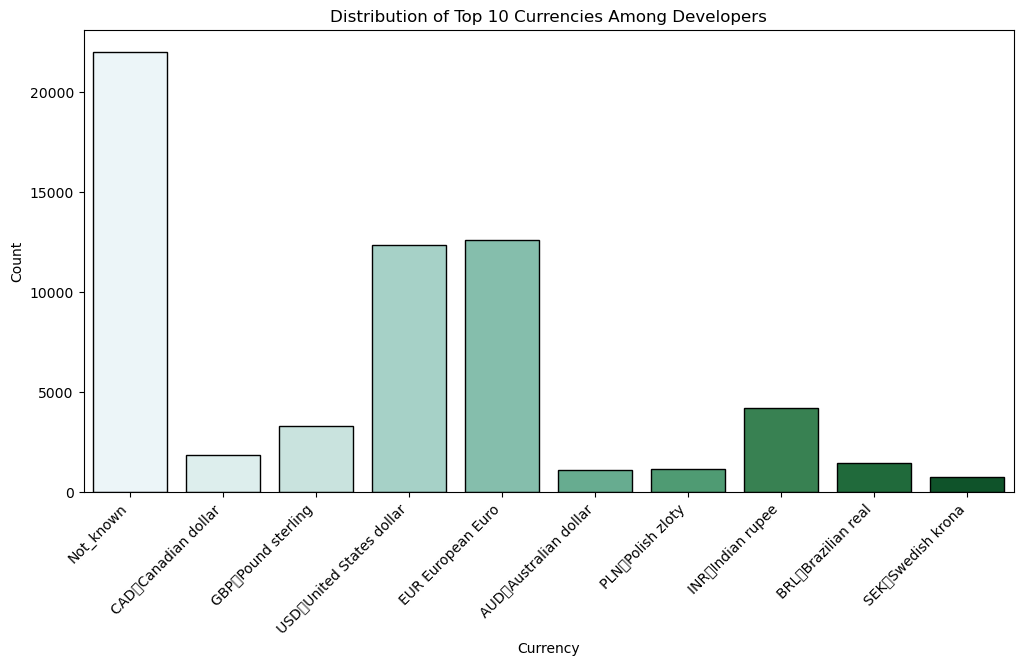

In [81]:
# Drop rows with missing values in the 'Currency' column
survey_df_filtered = survey_df.dropna(subset=['Currency'])

# Find the top 10 currencies
top_10_currencies = survey_df_filtered['Currency'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 currencies
filtered_df = survey_df_filtered[survey_df_filtered['Currency'].isin(top_10_currencies)]

# Plotting the bar chart for the top 10 currencies
plt.figure(figsize=(12, 6))
sns.countplot(x='Currency', data=filtered_df, palette='BuGn', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of Top 10 Currencies Among Developers')
plt.xlabel('Currency')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


The survey data reveals that a significant portion of developers is not interested in sharing the currency in which they earn. However, among those who disclosed their earnings, the majority reported earning in "Euro," followed closely by "USDollar."

- **Non-disclosure of Currency:**
  - A notable number of developers chose not to share the currency in which they earn, indicating a preference for privacy or a lack of interest in divulging this information.

- **Preferred Currency:**
  - Among developers who disclosed their earnings, the majority reported earning in "Euro," suggesting a significant representation of developers using this currency.

- **USDollar as the Second Choice:**
  - Following "Euro," "USDollar" emerged as the second most reported currency among developers who shared their earning information.

This insight sheds light on the varying levels of transparency among developers regarding their earnings and the prevalence of "Euro" as a commonly reported currency.
-- In survey most of developers is not intersetd to share their currency in which they earn but majority of developers who shared their earning in "Euro" followed by 'USDollar'

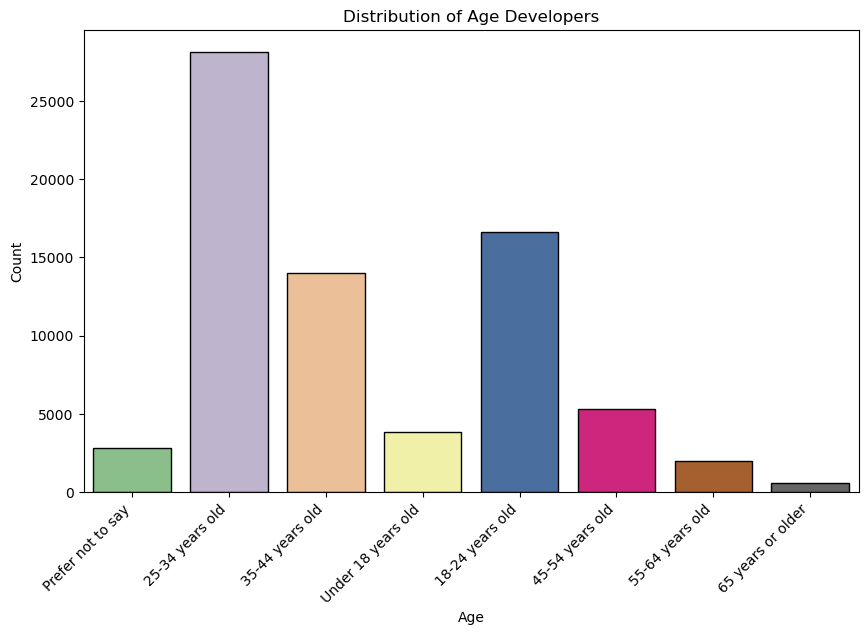

In [82]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=survey_df, palette='Accent', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of Age Developers')
plt.xlabel('Age')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

The analysis of developer age distribution in the survey reveals compelling insights:

- **Dominant Age Group:**
  - The majority of developers fall within the age range of 25-34 years, indicating a substantial presence of younger professionals in the developer community.

- **Noteworthy Older Developers:**
  - It's particularly interesting to observe that approximately 3000 developers belong to the age group of 55 years and above. This suggests a notable representation of older individuals in the developer community, showcasing diversity in age demographics.

This observation underscores the importance of considering a wide age range when addressing the characteristics and preferences of developers, as the community spans different generations.


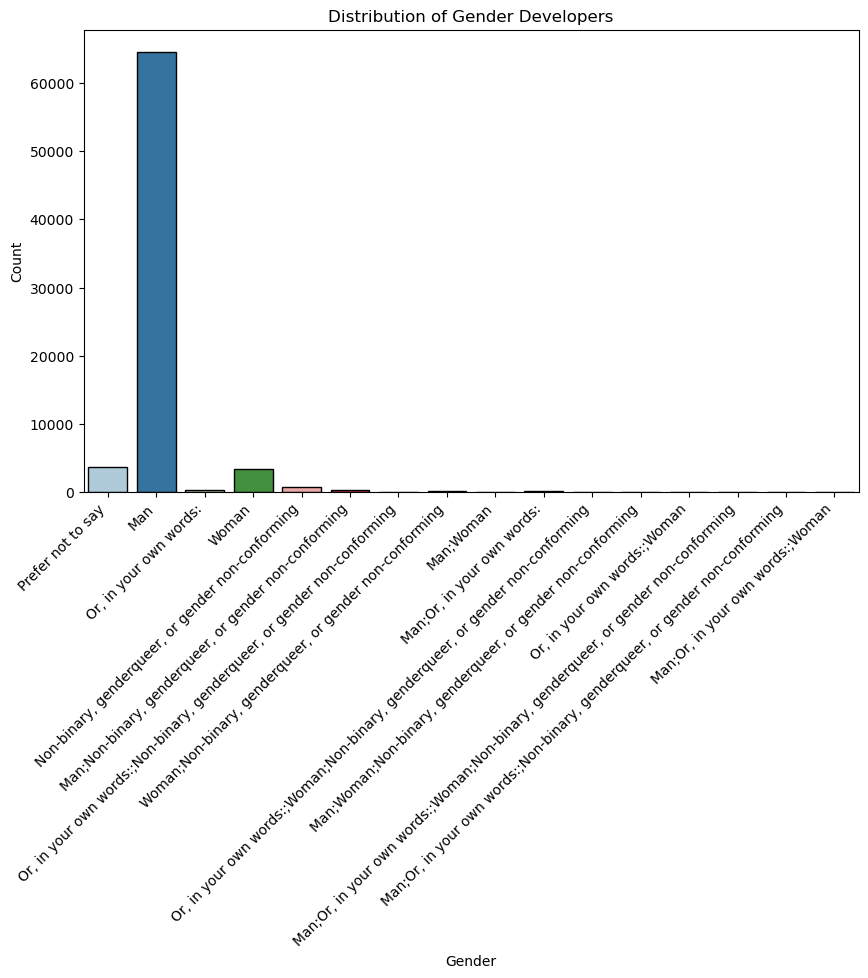

In [83]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=survey_df, palette='Paired', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of Gender Developers')
plt.xlabel('Gender')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

Majority of developers has developers. Which dominating the Developers world, but we can't ignore Woman which is increasing till 2022

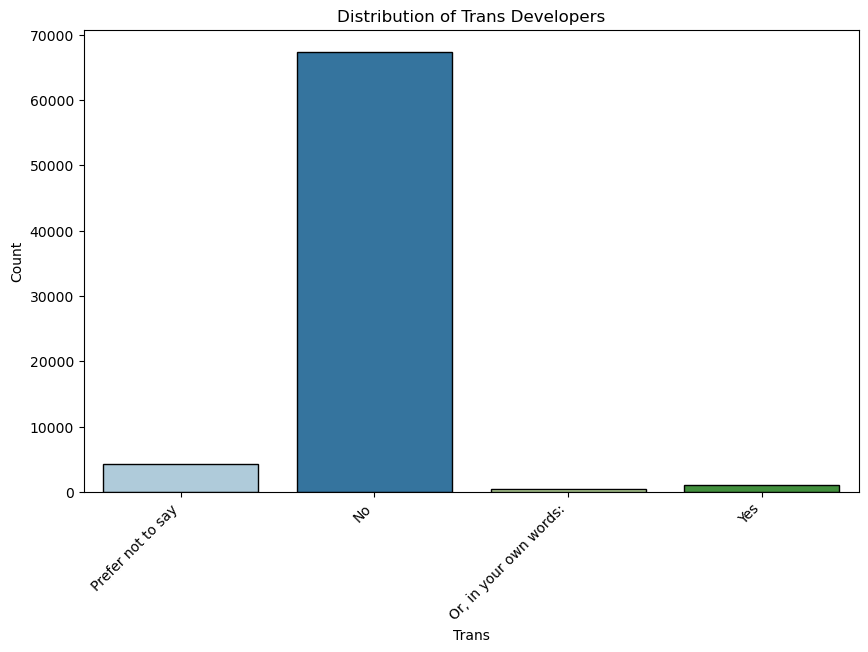

In [84]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Trans', data=survey_df, palette='Paired', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of Trans Developers')
plt.xlabel('Trans')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

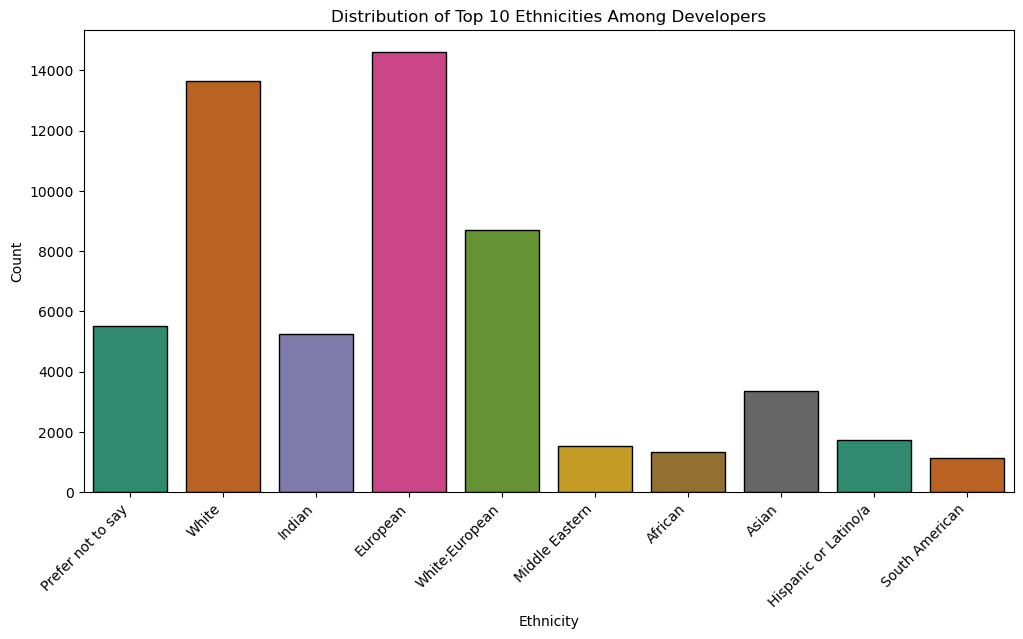

In [85]:
# Drop rows with missing values in the 'Ethnicity' column
survey_df_filtered = survey_df.dropna(subset=['Ethnicity'])

# Find the top 10 ethnicities
top_10_ethnicities = survey_df_filtered['Ethnicity'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 ethnicities
filtered_df = survey_df_filtered[survey_df_filtered['Ethnicity'].isin(top_10_ethnicities)]

# Plotting the bar chart for the top 10 ethnicities
plt.figure(figsize=(12, 6))
sns.countplot(x='Ethnicity', data=filtered_df, palette='Dark2', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of Top 10 Ethnicities Among Developers')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

The majority of developers belongs to 'European' ethinicity followed by 'White' and 'African' ethinicity group have lack of interest in coding.

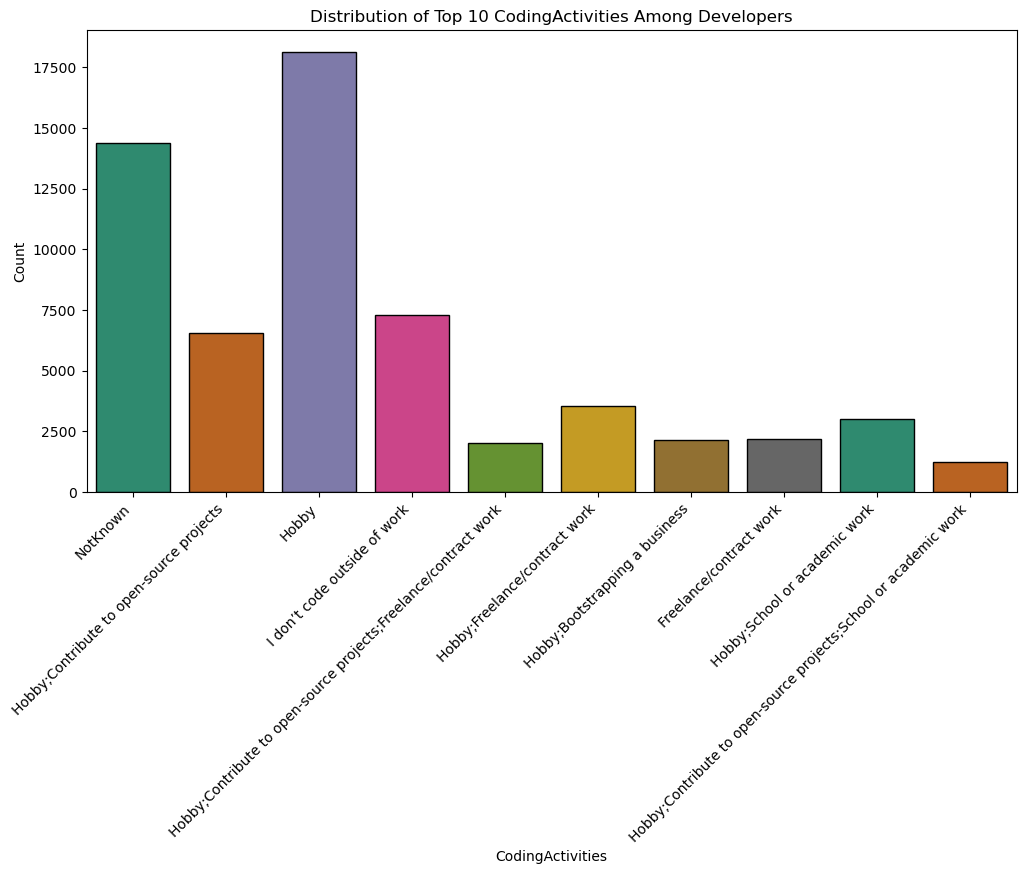

In [86]:
# Drop rows with missing values in the 'Ethnicity' column
survey_df_filtered = survey_df.dropna(subset=['CodingActivities'])

# Find the top 10 ethnicities
top_10_ethnicities = survey_df_filtered['CodingActivities'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 ethnicities
filtered_df = survey_df_filtered[survey_df_filtered['CodingActivities'].isin(top_10_ethnicities)]

# Plotting the bar chart for the top 10 ethnicities
plt.figure(figsize=(12, 6))
sns.countplot(x='CodingActivities', data=filtered_df, palette='Dark2', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of Top 10 CodingActivities Among Developers')
plt.xlabel('CodingActivities')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

Clearly from graph most of devlopers do coding as a hobby which is impressing

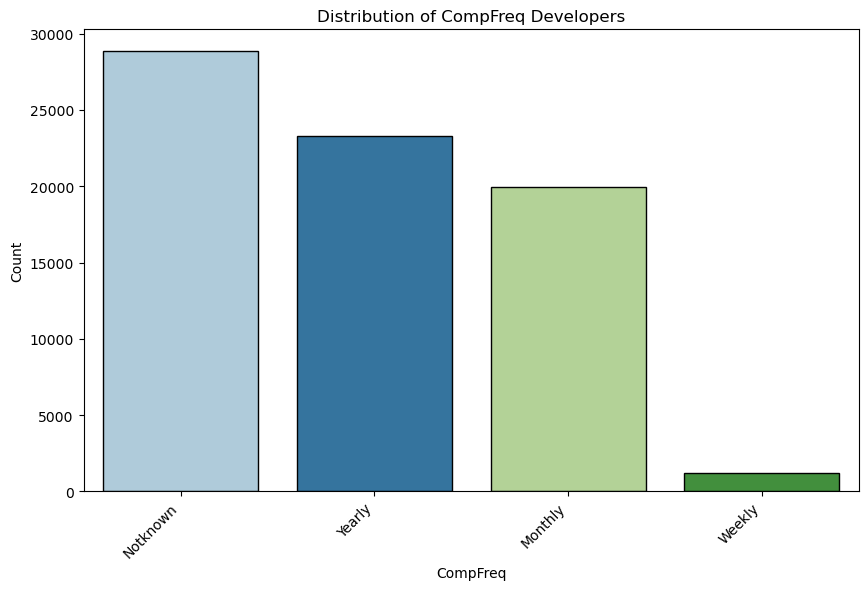

In [87]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='CompFreq', data=survey_df, palette='Paired', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of CompFreq Developers')
plt.xlabel('CompFreq')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

The graph depicts the frequency of developers' compensation intervals:

- The majority, 22,500 developers, receive their compensation yearly.
- Following closely, around 20,000 developers receive their compensation on a monthly basis.
- Notably, there is a smaller group of developers who receive their compensation weekly, which is quite impressive considering the less common frequency for salary disbursement.

This distribution provides insights into the varied compensation structures within the developer community, with the majority receiving annual or monthly compensation, while a noteworthy segment experiences weekly compensation.


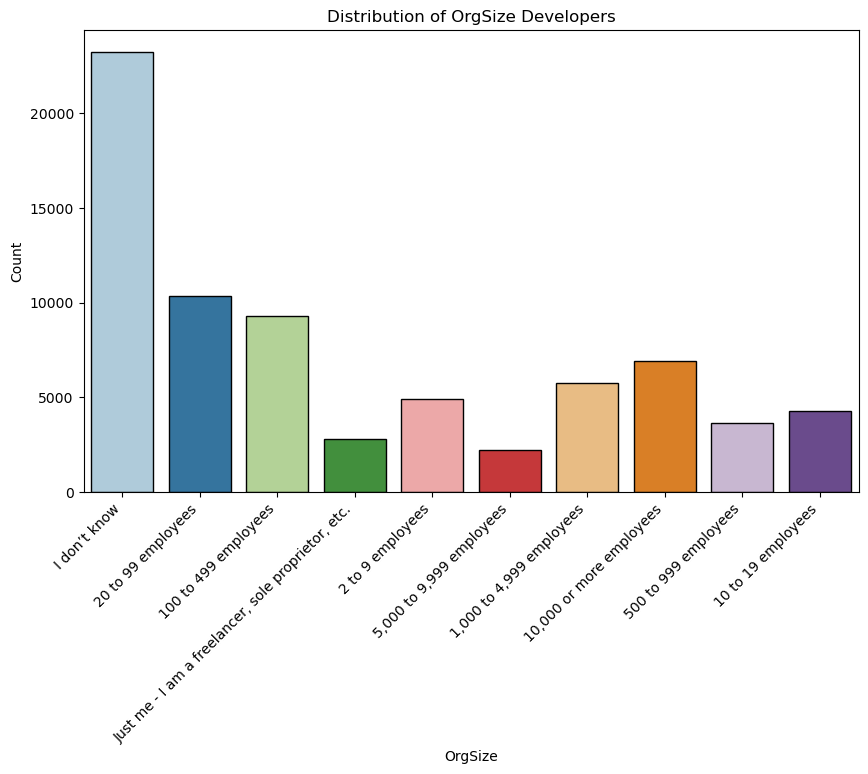

In [88]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='OrgSize', data=survey_df, palette='Paired', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of OrgSize Developers')
plt.xlabel('OrgSize')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

The bar graph illustrates the following insights:

1. A considerable number of developers did not specify the size of their organization, indicating a lack of awareness or disclosure regarding their workplace.

2. The largest group of developers, approximately 10,000, expressed a preference for working in organizations with 20-99 employees.

3. Following closely, around 9,000 developers indicated a preference for organizations with 100-499 employees.

4. A smaller segment, ranging between 2,500-2,700 developers, works in organizations with 5,000-9,999 employees, representing the lowest count among the specified categories.

In summary, the graph highlights a varied distribution of developers across different organization sizes, with a notable preference for smaller to mid-sized companies and a comparatively lower representation in larger organizations with 5,000-9,999 employees.


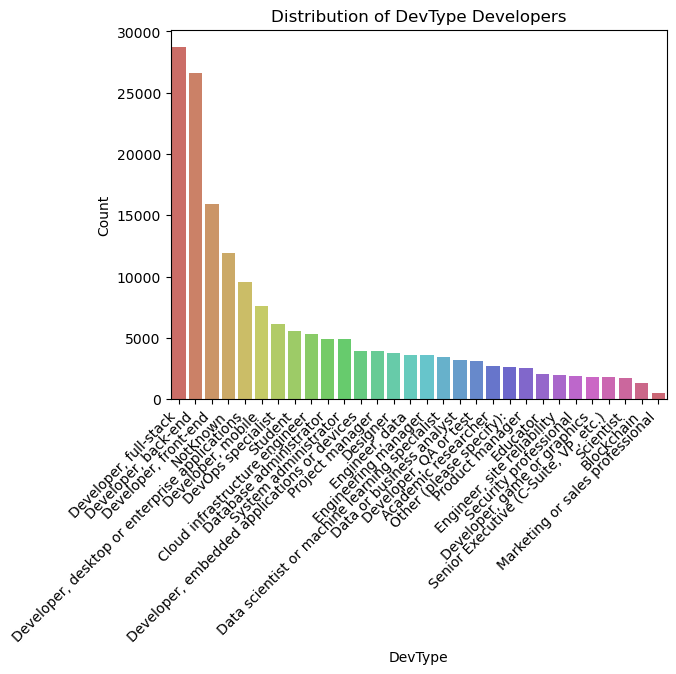

In [89]:
dev_types = survey_df['DevType'].str.split(';').explode()
countsdev = dev_types.value_counts()
sns.barplot(x = countsdev.index, y=countsdev.values, palette = 'hls')
plt.title('Distribution of DevType Developers')
plt.xlabel('DevType')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The bargraph reveals a diverse range of developer roles, with the most common being Developer Full Stack. Among specified roles, "Developer, front-end" and "Developer, back-end" are prominent. The dataset reflects the complexity of developer roles, including those with diverse skill sets and a significant presence in front-end development.

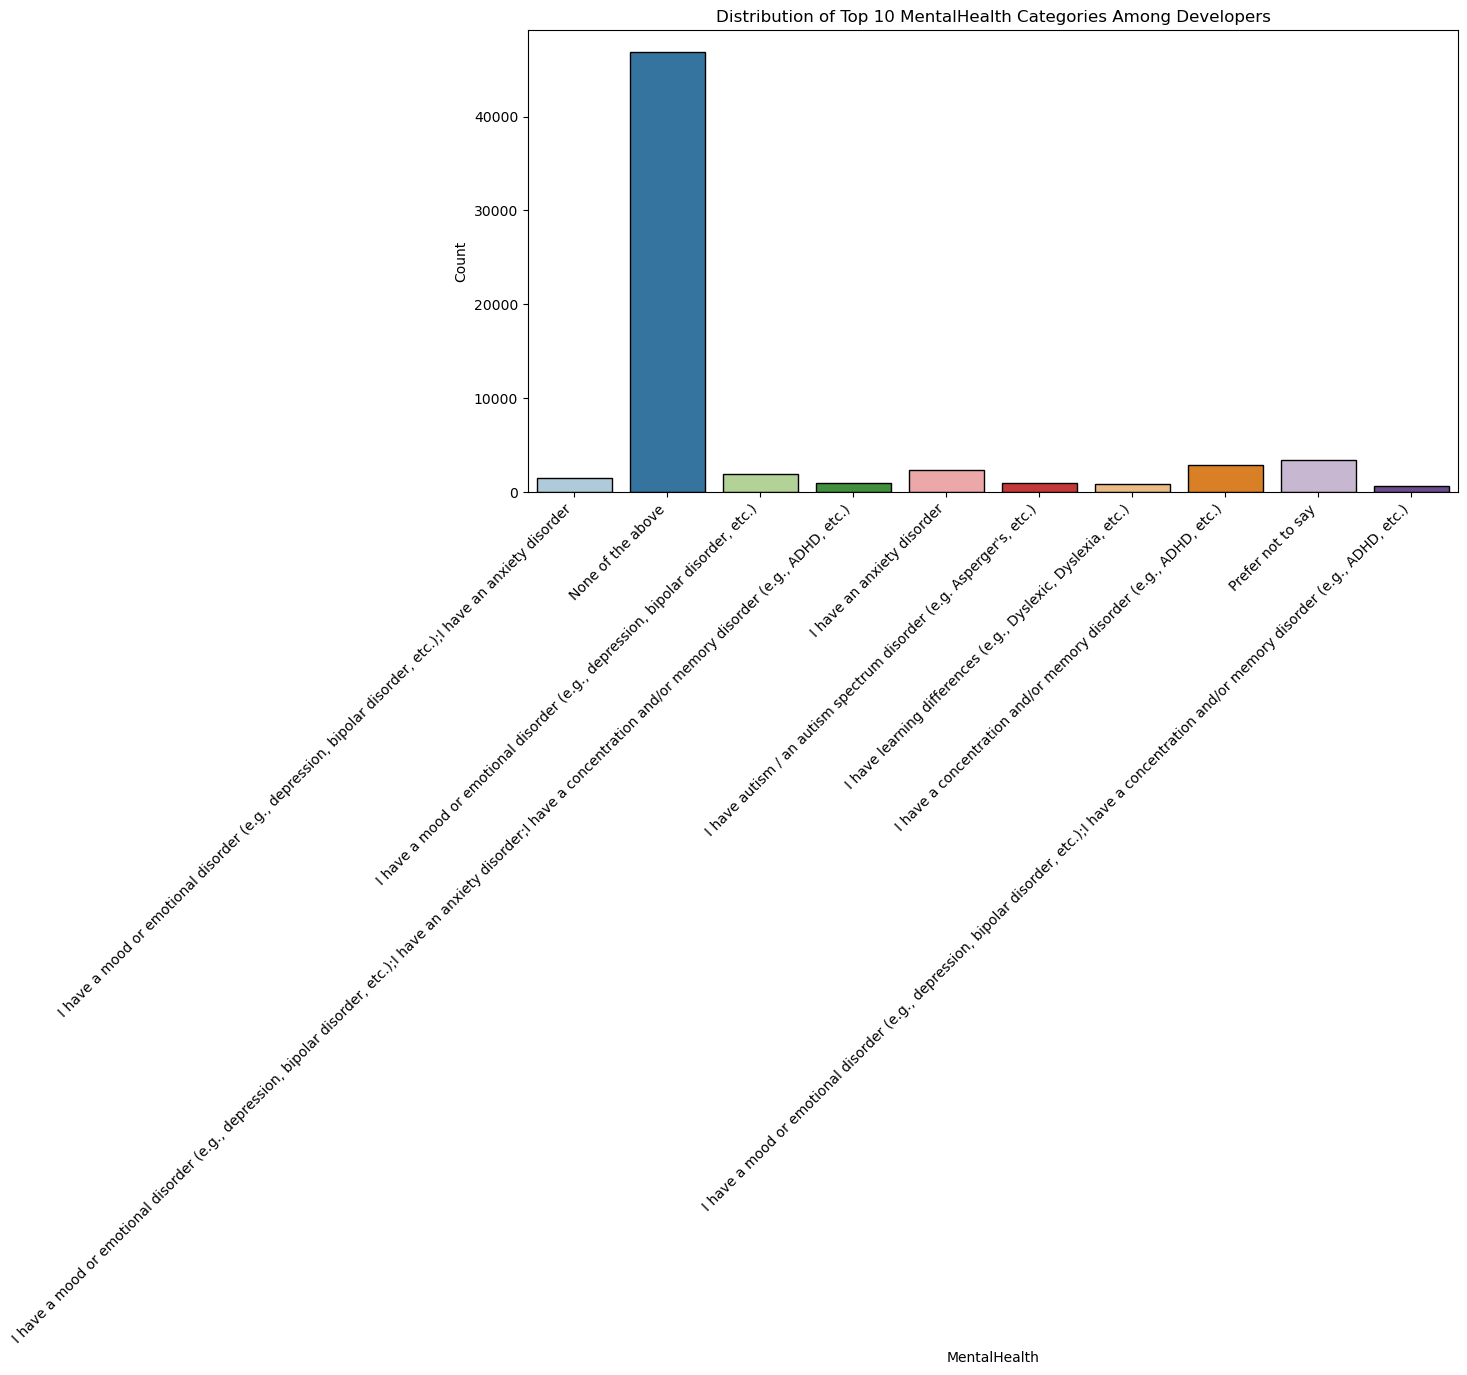

In [90]:
# Drop rows with missing values in the 'MentalHealth' column
survey_df_filtered = survey_df.dropna(subset=['MentalHealth'])

# Find the top 10 categories in 'MentalHealth'
top_10_mental_health = survey_df_filtered['MentalHealth'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 categories
filtered_df = survey_df_filtered[survey_df_filtered['MentalHealth'].isin(top_10_mental_health)]

# Plotting the bar chart for the top 10 categories in 'MentalHealth'
plt.figure(figsize=(12, 6))
sns.countplot(x='MentalHealth', data=filtered_df, palette='Paired', saturation=0.7, edgecolor='black', linewidth=1)

# Adding labels and title
plt.title('Distribution of Top 10 MentalHealth Categories Among Developers')
plt.xlabel('MentalHealth')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In the realm of developers' mental health, a diverse spectrum of conditions is apparent, yet a significant portion remains in a state of uncertainty regarding their mental well-being. Notably, there is a prevalent lack of self-awareness or acknowledgment of one's mental status among developers. Despite this prevailing uncertainty, it becomes evident that approximately 2000 developers grapple with anxiety disorders, constituting the foremost mental health challenge within this community. Following closely in prevalence is emotional disorder, exhibiting a slightly lower incidence compared to anxiety disorders. This observation underscores the nuanced landscape of mental health among developers, emphasizing the need for increased awareness and support within the professional sphere.

In [91]:
survey_df.corr(numeric_only=True)

,YearsCode,YearsCodePro,CompTotal
YearsCode,1.000000,0.765780,-0.001247
YearsCodePro,0.765780,1.000000,-0.042298
CompTotal,-0.001247,-0.042298,1.000000


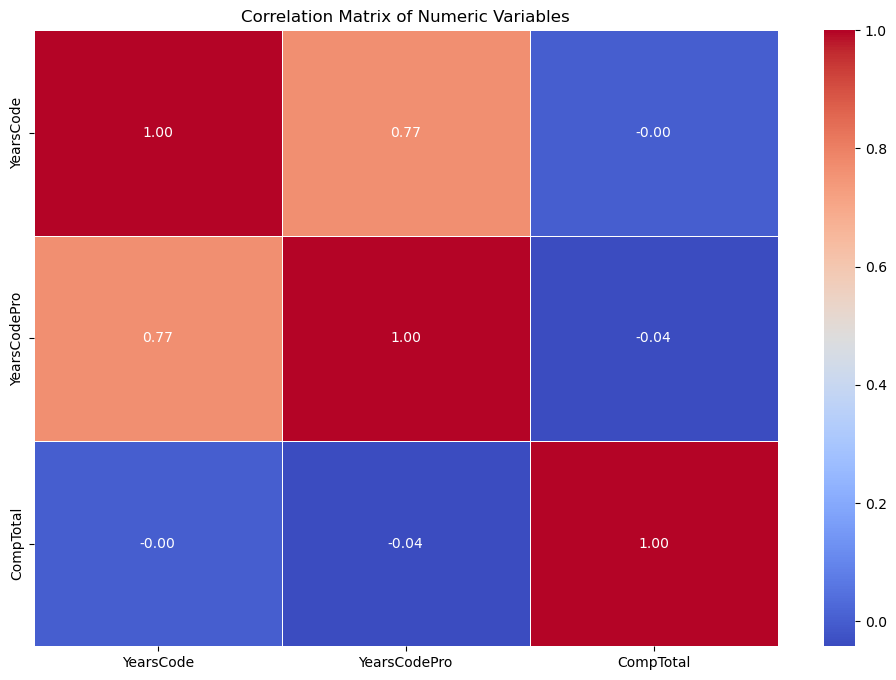

In [92]:
# Extract numeric columns for correlation analysis
numeric_columns = survey_df.select_dtypes(include=['float64']).columns

# Calculate the correlation matrix
correlation_matrix = survey_df[numeric_columns].corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

--There is a strong positive correlation between the number of years a person has been coding (YearsCode) and the number of years they have coded professionally (YearsCodePro).

--There is almost no correlation between the number of years a person has been coding (YearsCode) and their total compensation (CompTotal).

--There is a weak negative correlation between the number of years a person has coded professionally (YearsCodePro) and their total compensation (CompTotal), suggesting a slight decrease in compensation with more professional coding experience.

In [93]:
#let's walkthrough languages prefered by developers
survey_df['LanguageHaveWorkedWith'].value_counts()

NotKnown                                                                                    2293
HTML/CSS;JavaScript;TypeScript                                                              1250
Python                                                                                       962
HTML/CSS;JavaScript                                                                          914
HTML/CSS;JavaScript;PHP;SQL                                                                  745
                                                                                            ... 
C#;Java;JavaScript;PHP;PowerShell;SQL;TypeScript                                               1
C++;HTML/CSS;JavaScript;Python;Solidity;SQL                                                    1
Dart;Haskell;HTML/CSS;Java;R;SQL;TypeScript                                                    1
Bash/Shell;C;C#;Go;HTML/CSS;Java;JavaScript;Lua;Perl;PHP;Python;Ruby;Rust;SQL;TypeScript       1
C#;JavaScript;Lua;PowerShell;S

In [94]:
# Filter out rows with 'NotKnown' value
filtered_df = survey_df[survey_df['LanguageHaveWorkedWith'] != "NotKnown"]

# Get the value counts
value_counts = filtered_df['LanguageHaveWorkedWith'].value_counts()
print(value_counts)

HTML/CSS;JavaScript;TypeScript                                                              1250
Python                                                                                       962
HTML/CSS;JavaScript                                                                          914
HTML/CSS;JavaScript;PHP;SQL                                                                  745
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                        570
                                                                                            ... 
C#;Java;JavaScript;PHP;PowerShell;SQL;TypeScript                                               1
C++;HTML/CSS;JavaScript;Python;Solidity;SQL                                                    1
Dart;Haskell;HTML/CSS;Java;R;SQL;TypeScript                                                    1
Bash/Shell;C;C#;Go;HTML/CSS;Java;JavaScript;Lua;Perl;PHP;Python;Ruby;Rust;SQL;TypeScript       1
C#;JavaScript;Lua;PowerShell;S

In [95]:
# check unique languages contains

# Split the languages in each cell and create a list of all languages
all_languages = filtered_df['LanguageHaveWorkedWith'].str.split(';').explode()

# Get the unique languages
unique_languages = all_languages.unique()

# Print or use the unique_languages as needed
print(unique_languages)

['JavaScript' 'TypeScript' 'C#' 'C++' 'HTML/CSS' 'Python' 'SQL' 'Swift'
 'Lua' 'PHP' 'C' 'Java' 'Delphi' 'Bash/Shell' 'PowerShell' 'Rust' 'Elixir'
 'Erlang' 'Ruby' 'R' 'Scala' 'VBA' 'Dart' 'Go' 'Kotlin' 'Groovy' 'MATLAB'
 'Perl' 'Haskell' 'Julia' 'LISP' 'Assembly' 'F#' 'Clojure' 'APL' 'Crystal'
 'Fortran' 'Objective-C' 'SAS' 'OCaml' 'Solidity' 'COBOL']


In [96]:
counts = all_languages.value_counts() 

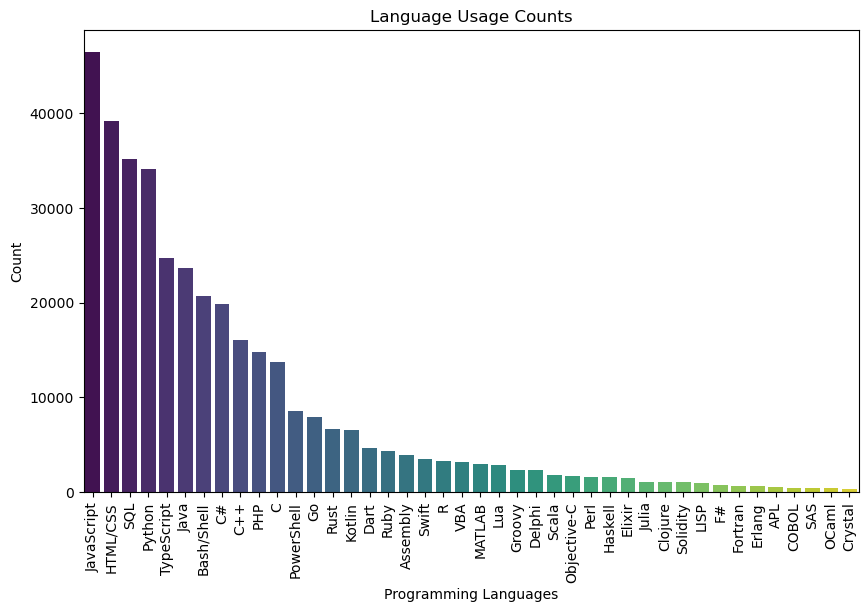

In [97]:
# Plot a bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Language Usage Counts')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.show()

Javascript is the most popular language among developers followed by HTML/CSS,SQL,Pyrhon these are the top 4 languages in current usage.

In [98]:
survey_df['LanguageWantToWorkWith'].value_counts()

NotKnown                                                        6241
Python                                                          1021
HTML/CSS;JavaScript;TypeScript                                   945
Rust                                                             825
C#                                                               568
                                                                ... 
HTML/CSS;Java;JavaScript;Kotlin;MATLAB;PowerShell;Python           1
C;C#;Dart;F#;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript        1
C;Clojure;Elixir;Go;JavaScript;Rust;TypeScript                     1
HTML/CSS;Java;Kotlin;Python;Scala;SQL                              1
Bash/Shell;C#;HTML/CSS;JavaScript;Perl;PowerShell;TypeScript       1
Name: LanguageWantToWorkWith, Length: 23953, dtype: int64

In [99]:
filtered_df1 = survey_df[survey_df['LanguageWantToWorkWith'] != 'NotKnown']
value = filtered_df1['LanguageWantToWorkWith'].value_counts()

In [100]:
all_languages_want = filtered_df1['LanguageWantToWorkWith'].str.split(';').explode()
unique_wants = all_languages_want.unique()
print(unique_wants)

['Rust' 'TypeScript' 'C#' 'C++' 'HTML/CSS' 'JavaScript' 'SQL' 'Elixir'
 'F#' 'Go' 'Lua' 'C' 'Java' 'Kotlin' 'Python' 'Swift' 'APL' 'Bash/Shell'
 'Delphi' 'Haskell' 'Erlang' 'Ruby' 'Scala' 'PowerShell' 'VBA' 'Julia'
 'PHP' 'Dart' 'Groovy' 'Perl' 'LISP' 'Clojure' 'Assembly' 'Solidity' 'R'
 'Crystal' 'Objective-C' 'SAS' 'OCaml' 'MATLAB' 'Fortran' 'COBOL']


In [101]:
value_1 = all_languages_want.value_counts()

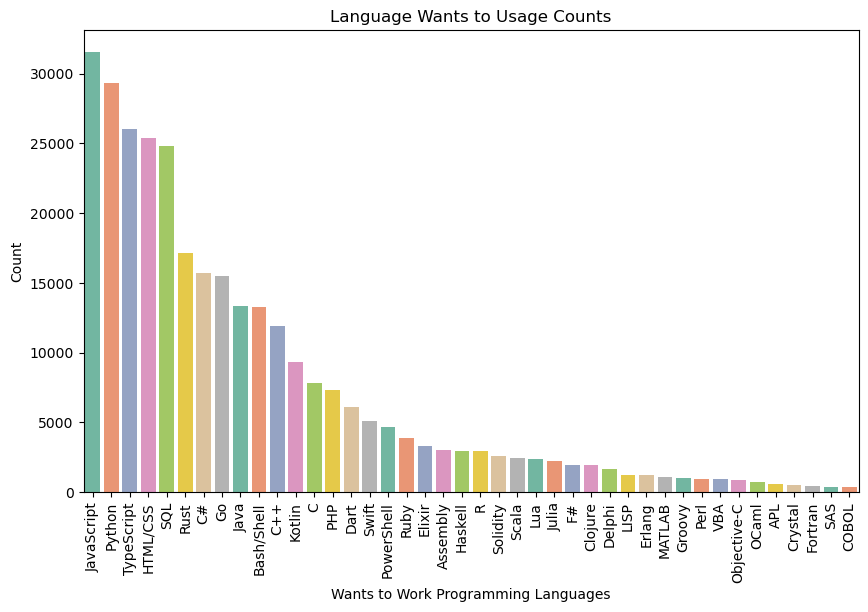

In [102]:
# Plot a bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=value_1.index, y=value_1.values, palette="Set2")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Language Wants to Usage Counts')
plt.xlabel('Wants to Work Programming Languages')
plt.ylabel('Count')
plt.show()

Developer desired languages are Javascript, Python, typescript which is shown emerging language 4. HTML/CSS 5. SQL 

In [103]:
survey_df['DatabaseHaveWorkedWith'].value_counts()

NotKnown                                                             13147
MySQL                                                                 3563
PostgreSQL                                                            3519
Microsoft SQL Server                                                  3238
SQLite                                                                2022
                                                                     ...  
Elasticsearch;IBM DB2;MongoDB;MySQL                                      1
Cloud Firestore;Microsoft SQL Server;MongoDB;MySQL;Neo4j                 1
Cloud Firestore;MongoDB;Oracle;PostgreSQL;Redis;SQLite                   1
MariaDB;Microsoft SQL Server;MySQL;Neo4j;Oracle;PostgreSQL;SQLite        1
Microsoft SQL Server;Neo4j;Redis                                         1
Name: DatabaseHaveWorkedWith, Length: 4224, dtype: int64

In [104]:
#check unique database used by developers
split = survey_df['DatabaseHaveWorkedWith'].str.split(';').explode()
unique_databases = split.unique()
print(unique_databases)

['NotKnown' 'Microsoft SQL Server' 'Cloud Firestore' 'Elasticsearch'
 'Firebase Realtime Database' 'MongoDB' 'MySQL' 'Couchbase' 'CouchDB'
 'PostgreSQL' 'Redis' 'DynamoDB' 'Neo4j' 'SQLite' 'Cassandra' 'MariaDB'
 'Oracle' 'IBM DB2']


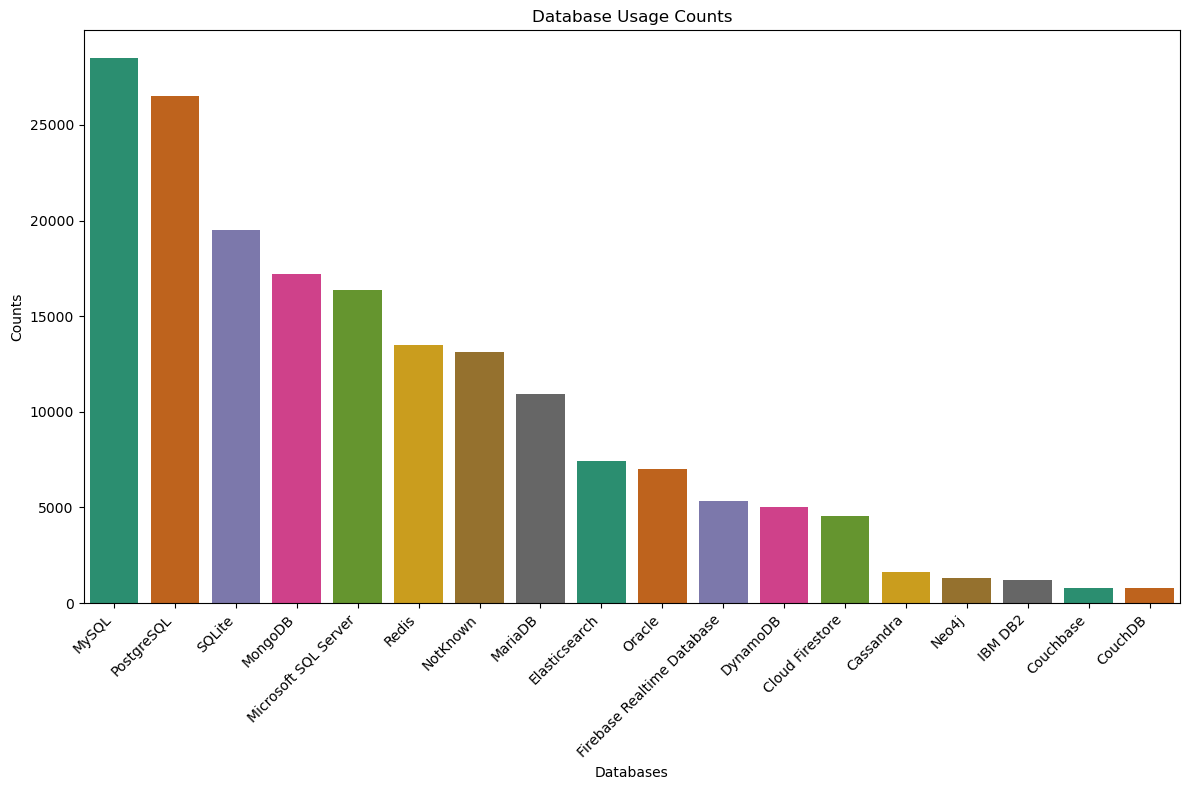

In [105]:
# Check counts or usage
usage = split.value_counts()

# Convert the index to a list if it is not already
usage_index = usage.index.tolist()

# Plot the graph for visualizing
plt.figure(figsize=(12, 8))
sns.barplot(x=usage_index, y=usage.values, palette='Dark2')
plt.title('Database Usage Counts')
plt.xlabel('Databases')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [106]:
def unique(df, column_name):
    #split
    split_1 = df[column_name].str.split(';').explode()
    unique_1 = split_1.unique()
    counts_2 = split_1.value_counts()
    return unique_1, counts_2
unique(survey_df, 'DatabaseWantToWorkWith')

(array(['NotKnown', 'Microsoft SQL Server', 'Cloud Firestore',
        'Elasticsearch', 'Firebase Realtime Database', 'Redis', 'MySQL',
        'Oracle', 'PostgreSQL', 'Neo4j', 'MongoDB', 'SQLite', 'MariaDB',
        'Cassandra', 'CouchDB', 'DynamoDB', 'IBM DB2', 'Couchbase'],
       dtype=object),
 PostgreSQL                    25212
 NotKnown                      22254
 MongoDB                       17297
 MySQL                         16271
 Redis                         16211
 SQLite                        14085
 Microsoft SQL Server           9867
 Elasticsearch                  8533
 MariaDB                        7181
 Firebase Realtime Database     5312
 DynamoDB                       5309
 Cloud Firestore                3873
 Oracle                         3511
 Cassandra                      3178
 Neo4j                          2354
 CouchDB                        1154
 Couchbase                       955
 IBM DB2                         519
 Name: DatabaseWantToWorkWith, dty

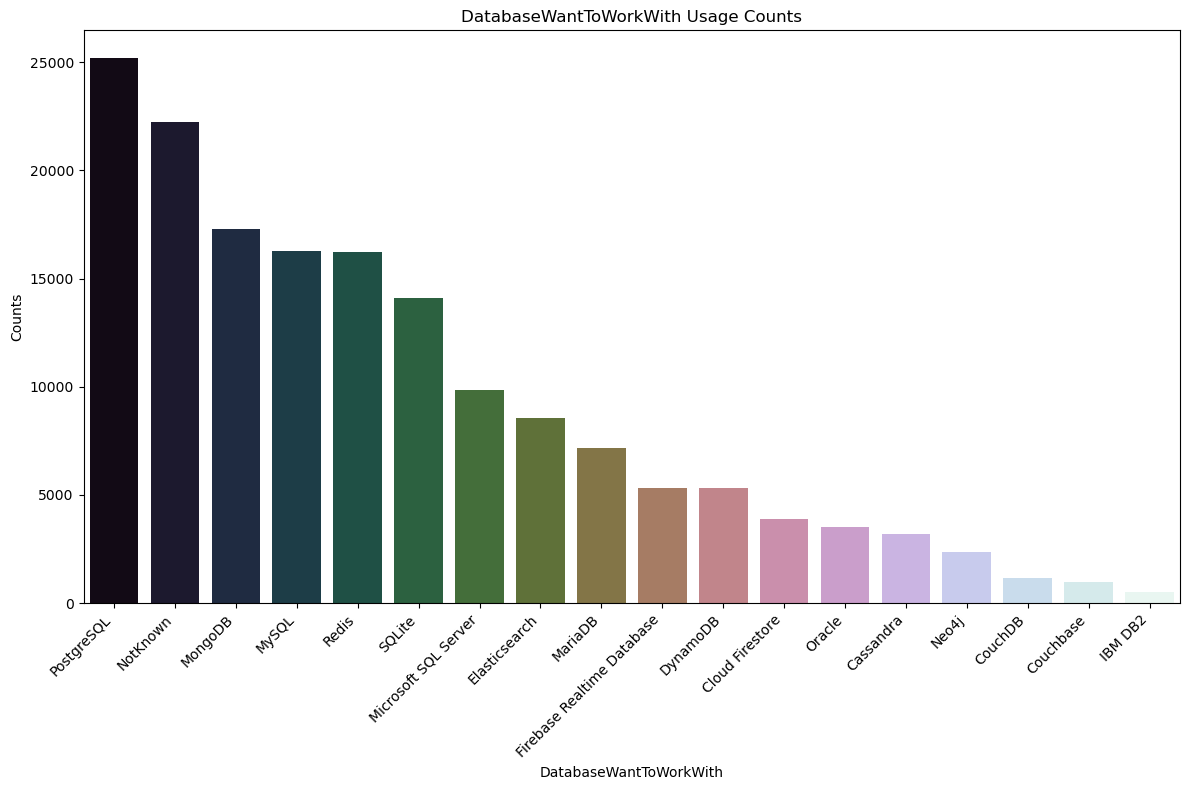

In [107]:
def plot_counts(df, column_name):
    # Get unique values and their counts
    unique_values, counts = unique(df, column_name)

    # Plot the graph for visualizing
    plt.figure(figsize=(12, 8))
    sns.barplot(x=counts.index, y=counts.values, palette='cubehelix')
    plt.title(f'{column_name} Usage Counts')
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout for better appearance
    plt.show()
# Example usage
plot_counts(survey_df, 'DatabaseWantToWorkWith')

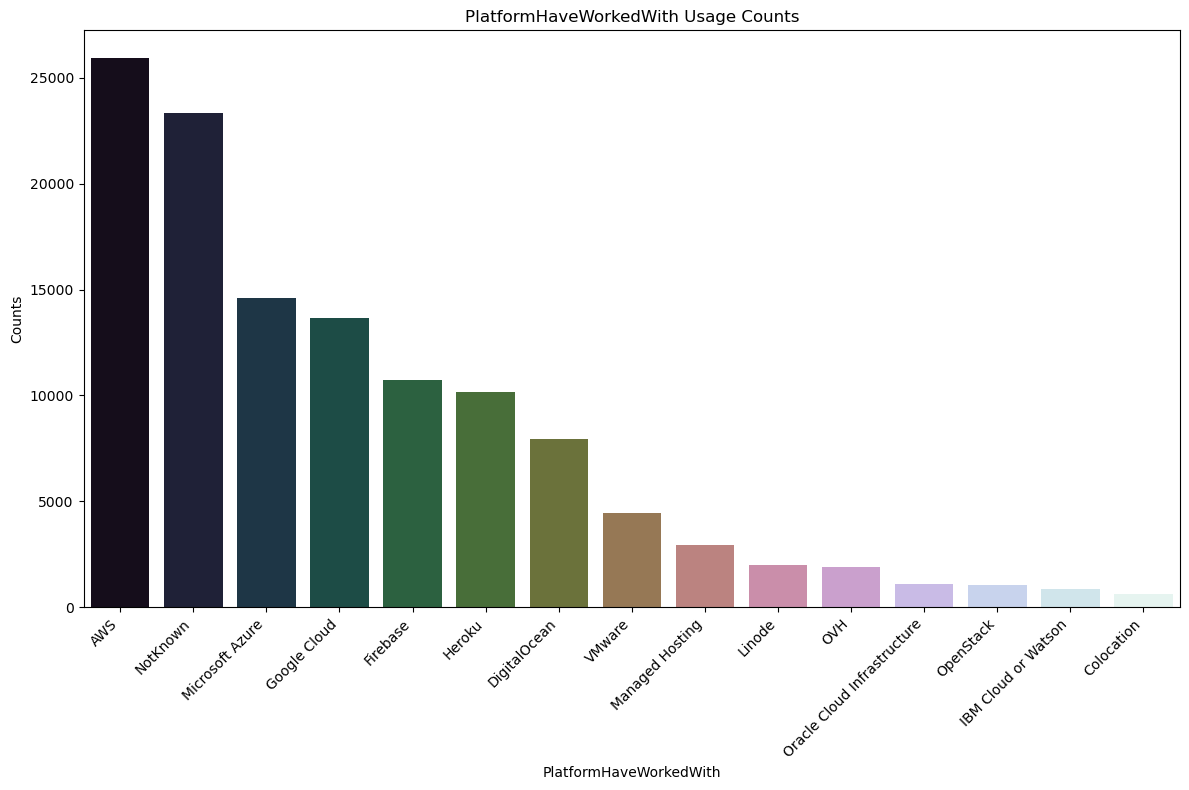

In [108]:
plot_counts(survey_df, 'PlatformHaveWorkedWith')

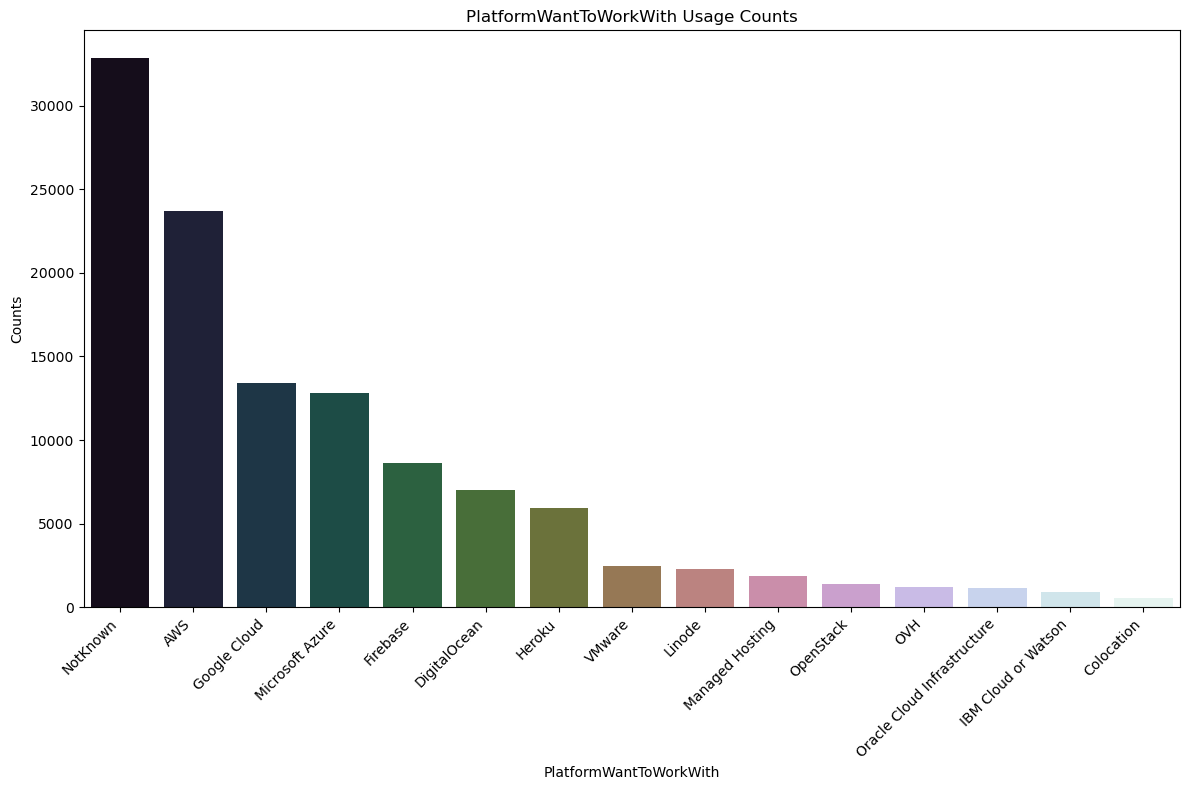

In [109]:
plot_counts(survey_df, 'PlatformWantToWorkWith')

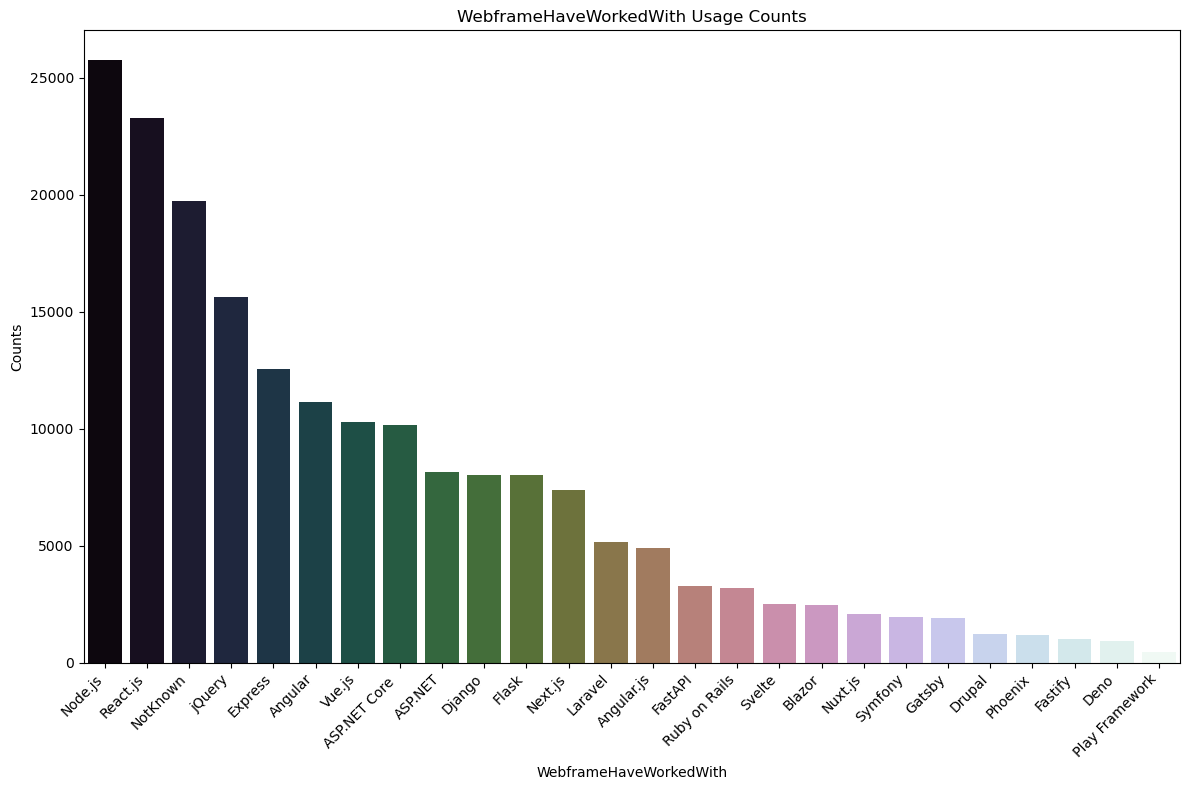

In [110]:
plot_counts(survey_df, 'WebframeHaveWorkedWith')

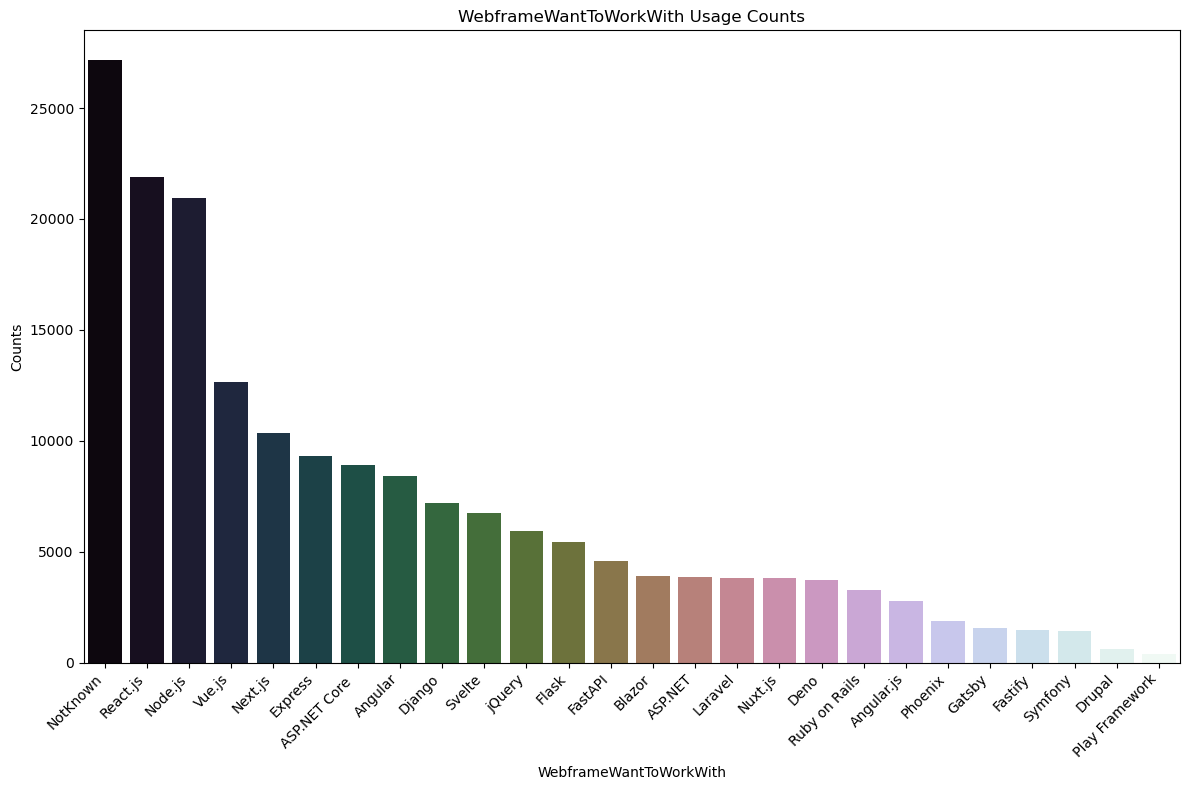

In [111]:
plot_counts(survey_df, 'WebframeWantToWorkWith')

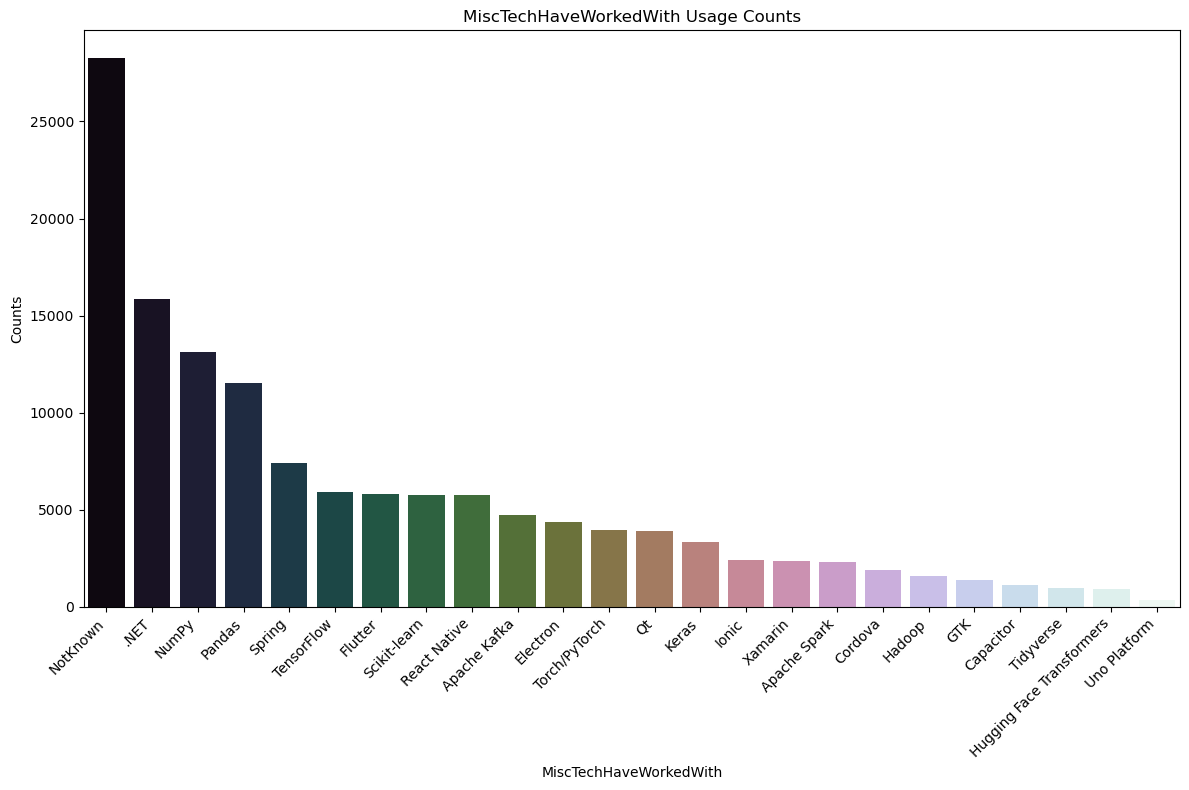

In [112]:
plot_counts(survey_df,'MiscTechHaveWorkedWith')

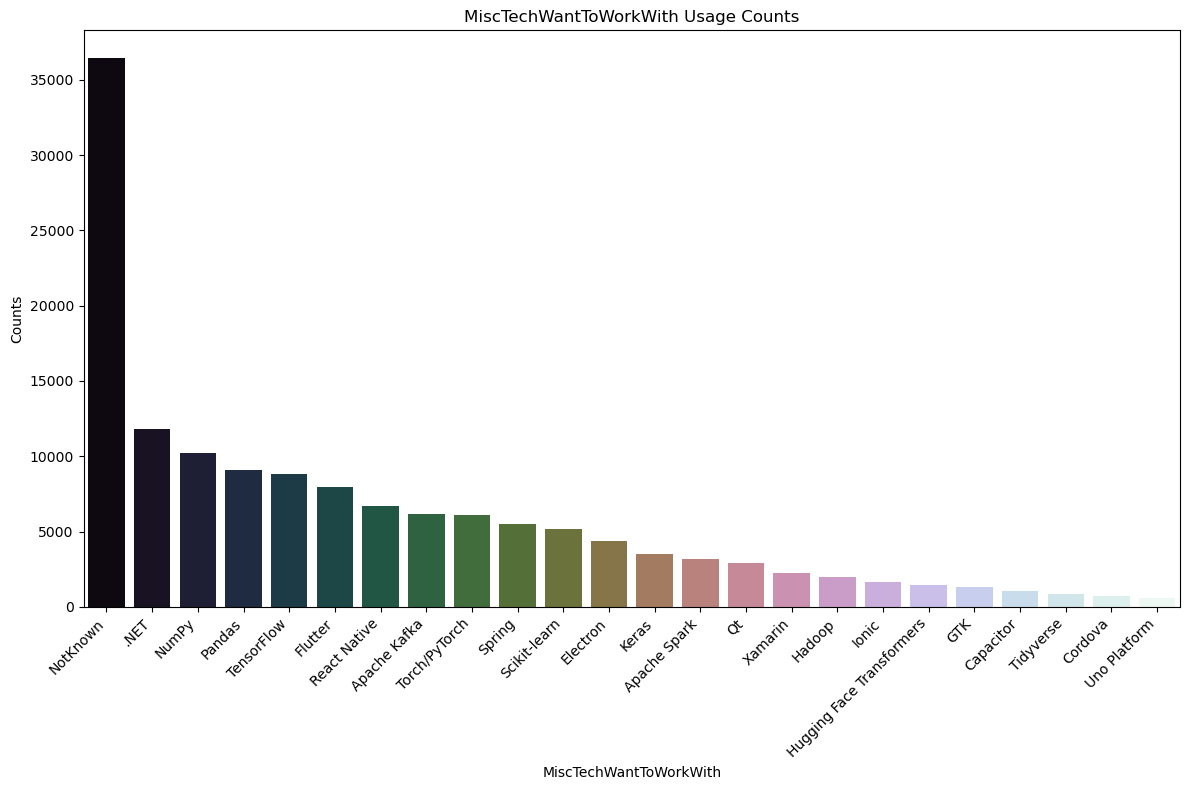

In [113]:
plot_counts(survey_df, 'MiscTechWantToWorkWith')

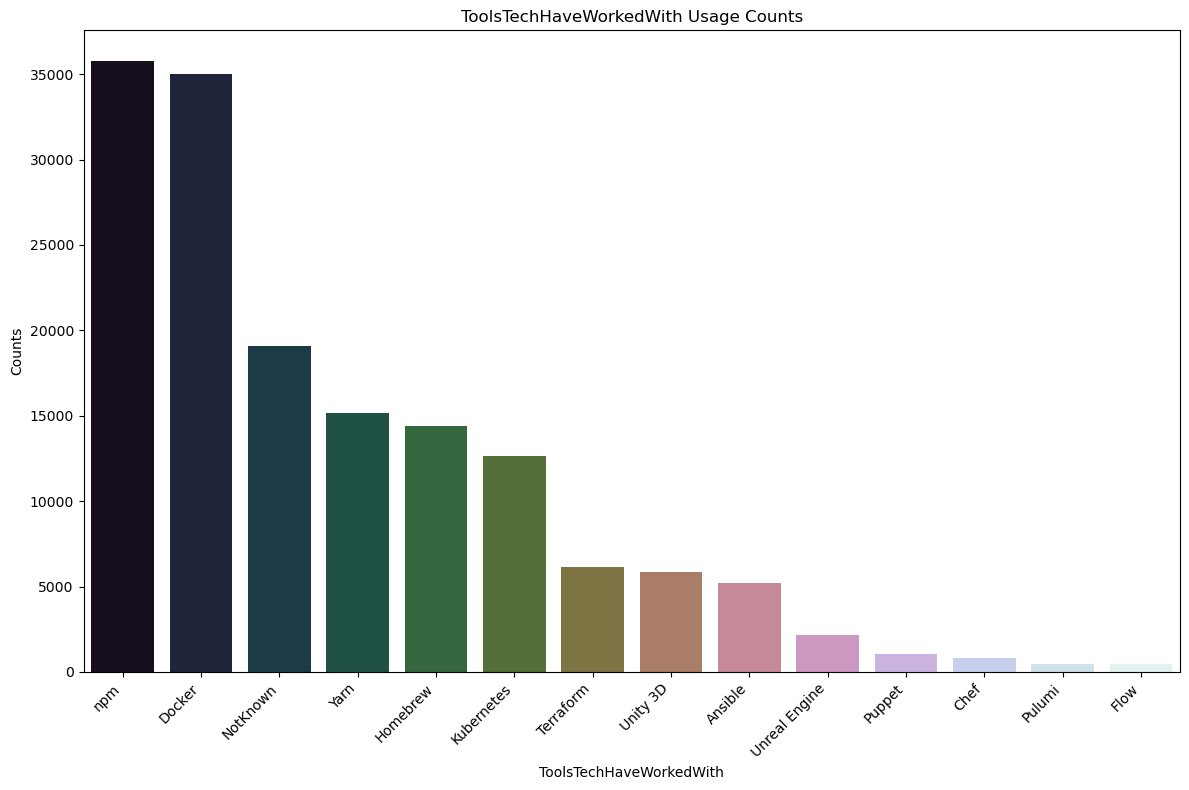

In [114]:
plot_counts(survey_df, 'ToolsTechHaveWorkedWith')

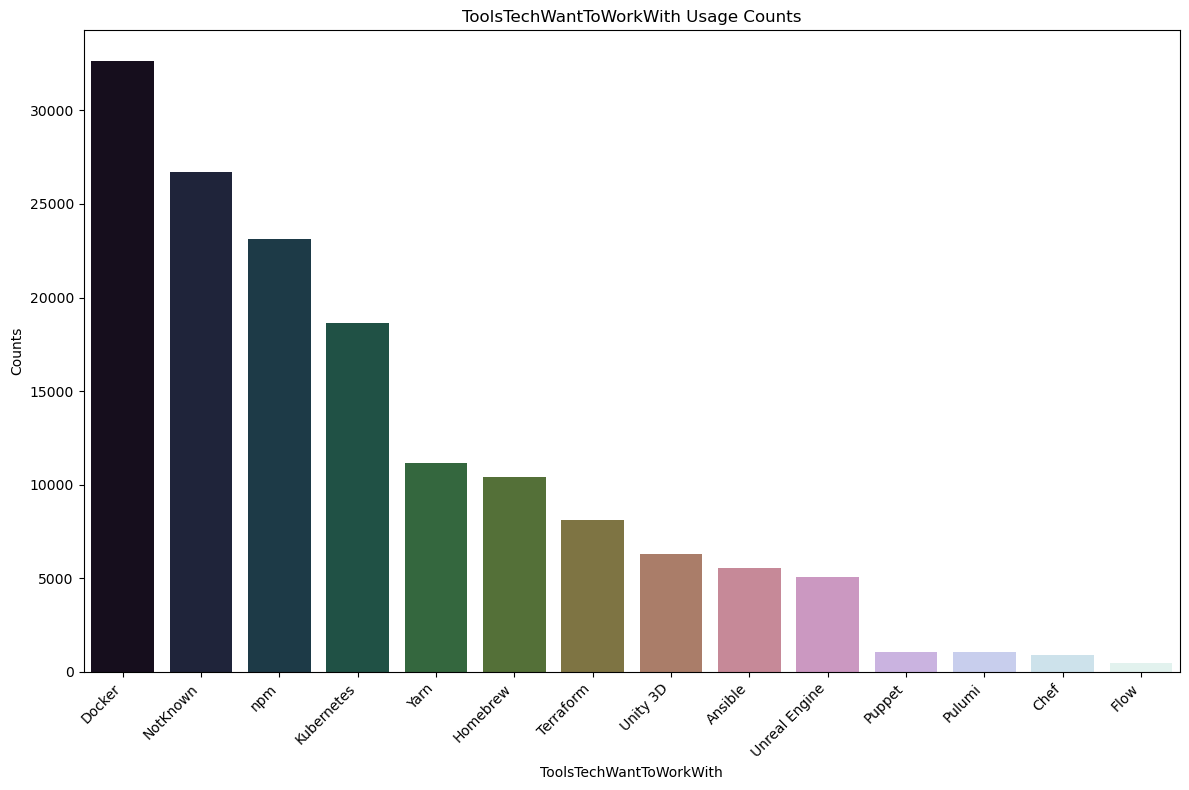

In [115]:
plot_counts(survey_df, 'ToolsTechWantToWorkWith')

##### Insights from Stack Overflow Developers Annual Survey 2022
1. Coding Experience and Compensation:
- The distribution of coding experience resembles a somewhat normal distribution, showcasing a substantial cohort of professional coders with around 10 years of experience.
- The compensation landscape is diverse, with a majority earning around 70,000, but a significant minority earning six-figure incomes, highlighting overall diversity in compensation.
- Notable correlations include a strong positive correlation between the number of years coding and coding professionally, but almost no correlation between coding experience and total compensation. Additionally, a weak negative correlation suggests a slight decrease in compensation with more years of professional coding.
2. Demographic Insights:
- The 25-34 age group dominates the developer community, but there's also a significant representation of older developers, indicating a diverse age demographic.
- A gender imbalance is evident, with a majority of male developers, but the presence of female developers is increasing.
- "European" is the predominant ethnicity, and there is a lack of interest in coding among some ethnic groups.
- Remote work is widely preferred, reflecting a trend towards flexible or hybrid work setups within the community.
- Educational backgrounds vary, with a majority holding Bachelor's degrees, and a notable presence of developers with Master's degrees or other advanced degrees.
- The United States has the highest number of developers, followed by India, Germany, the United Kingdom, and Canada, representing a global diversity of respondents.
3. Additional Findings:
- Transparency regarding earnings is limited, with a majority of developers choosing not to disclose their currency. Among those who disclosed, "Euro" and "USDollar" are the most reported currencies.
- Mental health is a complex aspect, with a diverse spectrum of conditions. Anxiety disorders are prevalent, underscoring the need for increased awareness and support within the professional sphere.
- The professional landscape includes a variety of roles, with "Developer Full Stack," "Developer, front-end," and "Developer, back-end" being prominent.
4. Programming Language Trends:
- JavaScript emerges as the most popular language among developers, followed by HTML/CSS, SQL, and Python, reflecting the current landscape of language usage.
- In terms of developers' desired languages, JavaScript remains at the forefront, followed by Python and TypeScript, indicating the continued prominence of these languages in future development.
5. Database Management System Preferences:
- MySQL, PostgreSQL, and SQLite are identified as the current industry-demanded database management systems, highlighting their prevalence in professional settings.
- Developers, however, express different preferences, with PostgreSQL being their first choice, followed by MongoDB and MySQL. This disparity suggests a nuanced landscape where industry demands and developer preferences may not perfectly align.
6. Emerging Technology Trends:
- AWS, Node.js, and Docker are identified as technologies on the rise, indicating increasing trends in their adoption among developers.
- This insight provides valuable information for organizations looking to stay at the forefront of technological advancements and align their strategies with emerging trends.
###### Conclusion:
The Stack Overflow Developers Annual Survey 2022 offers a holistic view of the coding community, encompassing experience, compensation, demographics, and technological preferences. From understanding language and database trends to emerging technologies, these insights provide a solid foundation for strategic decision-making, talent acquisition, and community engagement within the ever-evolving landscape of software development.

#### Bivariate Analysis

In [116]:
salary_by_devloper = survey_df.groupby('DevType')['CompTotal'].mean()

In [117]:
salary_by_devloper

DevType
Academic researcher                                             117970.428571
Academic researcher;Blockchain                                   40833.333333
Academic researcher;Blockchain;Security professional             77500.000000
Academic researcher;Cloud infrastructure engineer                58850.000000
Academic researcher;Cloud infrastructure engineer;Blockchain    118333.333333
                                                                    ...      
System administrator                                            123709.840237
System administrator;Blockchain                                  39166.666667
System administrator;Blockchain;Security professional            77500.000000
System administrator;Marketing or sales professional             53000.000000
System administrator;Security professional                       64527.777778
Name: CompTotal, Length: 9985, dtype: float64

In [118]:
#split each developer to get clear analysis
each_dev = survey_df['DevType'].str.split(';').explode()
unique_devloper_type = each_dev.unique()
print(unique_devloper_type)

['NotKnown' 'Data scientist or machine learning specialist'
 'Developer, front-end' 'Engineer, data' 'Engineer, site reliability'
 'Developer, full-stack' 'Developer, back-end'
 'Developer, desktop or enterprise applications' 'Developer, QA or test'
 'Student' 'Developer, mobile' 'Educator' 'Engineering manager'
 'Database administrator' 'Academic researcher' 'DevOps specialist'
 'Other (please specify):' 'Developer, embedded applications or devices'
 'Developer, game or graphics' 'Project manager'
 'Cloud infrastructure engineer' 'Data or business analyst' 'Designer'
 'Scientist' 'Product manager' 'Senior Executive (C-Suite, VP, etc.)'
 'System administrator' 'Blockchain' 'Marketing or sales professional'
 'Security professional']


In [119]:
# Create a new DataFrame with 'DevType' and 'Compensation' columns
new_df = pd.DataFrame({'DevType': each_dev, 'Compensation': survey_df['CompTotal'], 'YearsCode': survey_df['YearsCode'], 'YearsCodePro':survey_df['YearsCodePro']})
# Group by 'DevType' and calculate the mean of 'Compensation'
result_df = new_df.groupby('DevType')['Compensation'].mean().reset_index()
result_df = result_df.sort_values(by='Compensation', ascending=False)
print(result_df)

                                          DevType   Compensation
19                            Engineering manager  384089.313654
18                     Engineer, site reliability  351764.658449
1                                      Blockchain  350774.414747
23                                Product manager  342300.366746
27           Senior Executive (C-Suite, VP, etc.)  337665.525762
2                   Cloud infrastructure engineer  320080.506341
9                             Developer, back-end  317542.100094
17                                 Engineer, data  314867.920556
15                              Developer, mobile  305635.212209
24                                Project manager  297376.192456
4   Data scientist or machine learning specialist  295397.905082
7                               DevOps specialist  288565.398703
12                           Developer, front-end  285642.042790
5                          Database administrator  280015.937373
13                       

Based on the sorted result DataFrame, it appears that different developer types have varying average compensations. Here are some observations:

1. Engineering Manager has the highest average compensation, followed by roles like Engineer, site reliability and Blockchain.

2. Student has the lowest average compensation among the listed developer types.

3. Roles such as Product Manager, Senior Executive (C-Suite, VP, etc.), and Cloud Infrastructure Engineer also have relatively high average compensations.

4. NotKnown and Academic Researcher seem to have lower average compensations compared to many other roles.

It's important to note that these averages may be influenced by various factors, including experience, location, and the specific nature of the job within each category. Additionally, outliers in the data can significantly impact averages. Therefore, while these observations provide a general overview, further analysis and consideration of these factors would be necessary to draw more precise conclusions.

In [120]:
education_by_compensation = survey_df.groupby('EdLevel')['CompTotal'].mean()

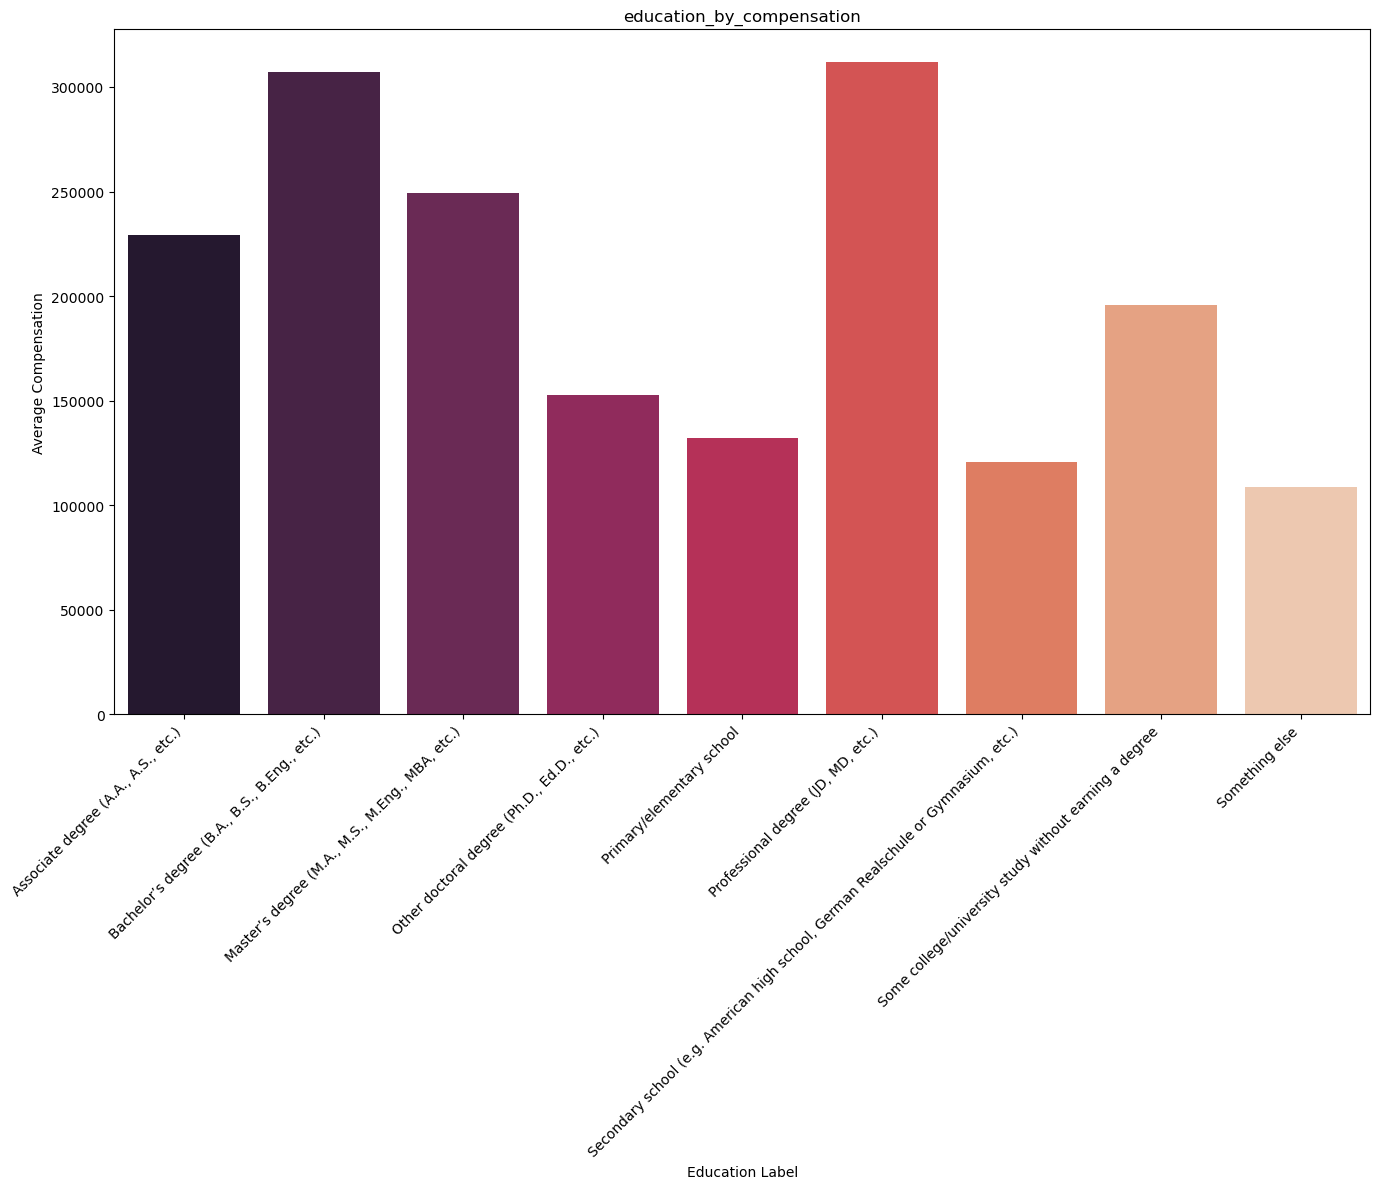

In [121]:
plt.figure(figsize=(14,12))
sns.barplot(x =education_by_compensation.index, y= education_by_compensation.values, palette = 'rocket' )
plt.title('education_by_compensation')
plt.xlabel('Education Label')
plt.ylabel('Average Compensation')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

1. Professional degree (JD, MD, etc.) has the highest average compensation, followed by Bachelor’s degree (B.A., B.S., B.Eng., etc.). This suggests that individuals with professional degrees tend to have higher average compensations.

2. Other doctoral degree (Ph.D., Ed.D., etc.) has a lower average compensation compared to professional degrees but is higher than the average compensation for master's and bachelor's degrees.

3. Master’s degree (M.A., M.S., M.Eng., MBA, etc.) comes next in terms of average compensation, followed by Some college/university study without earning a degree.

4. Individuals with an Associate degree (A.A., A.S., etc.) have a lower average compensation compared to those with higher degrees but still higher than some other categories.

5. Secondary school and Primary/elementary school education levels have relatively lower average compensations, suggesting that higher education is generally associated with higher compensation.

6. Something else and Other (please specify) categories have lower average compensations, indicating that these categories might include diverse educational backgrounds with varying compensation levels.

It's important to note that these observations are based on average values and may not account for other factors such as work experience, location, and industry, which can also significantly influence compensation levels. Further analysis and consideration of these factors would provide a more comprehensive understanding of the relationship between education level and compensation.

In [122]:
survey_df['Employment'].value_counts()

Employed, full-time                                                                                                                    42962
Student, full-time                                                                                                                      6756
Independent contractor, freelancer, or self-employed                                                                                    4978
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                3486
Not employed, but looking for work                                                                                                      1831
                                                                                                                                       ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                                            1
Employed, ful

In [123]:
#split the employment to extract unique employement
unique = survey_df['Employment'].str.split(';').explode()
unique_employee = unique.unique()
employee_counts = unique.value_counts()
print(unique_employee)
print('\n')
print(employee_counts)

['Not_known' 'Employed, full-time' 'Student, full-time'
 'Student, part-time' 'Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Employed, part-time' 'Not employed, and not looking for work' 'Retired'
 'I prefer not to say']


Employed, full-time                                     49199
Student, full-time                                      10932
Independent contractor, freelancer, or self-employed    10721
Employed, part-time                                      4154
Student, part-time                                       3722
Not employed, but looking for work                       3381
Not_known                                                1559
Not employed, and not looking for work                   1244
I prefer not to say                                       611
Retired                                                   396
Name: Employment, dtype: int64


In [124]:
df = pd.DataFrame({'Employment': unique, 'Compensation': survey_df['CompTotal'], 'YearsCode': survey_df['YearsCode'], 'YearsCodePro': survey_df['YearsCodePro']})
Employment_by_compensation = df.groupby('Employment')['Compensation'].mean()
Employment_by_compensation = Employment_by_compensation.sort_values(ascending = False)

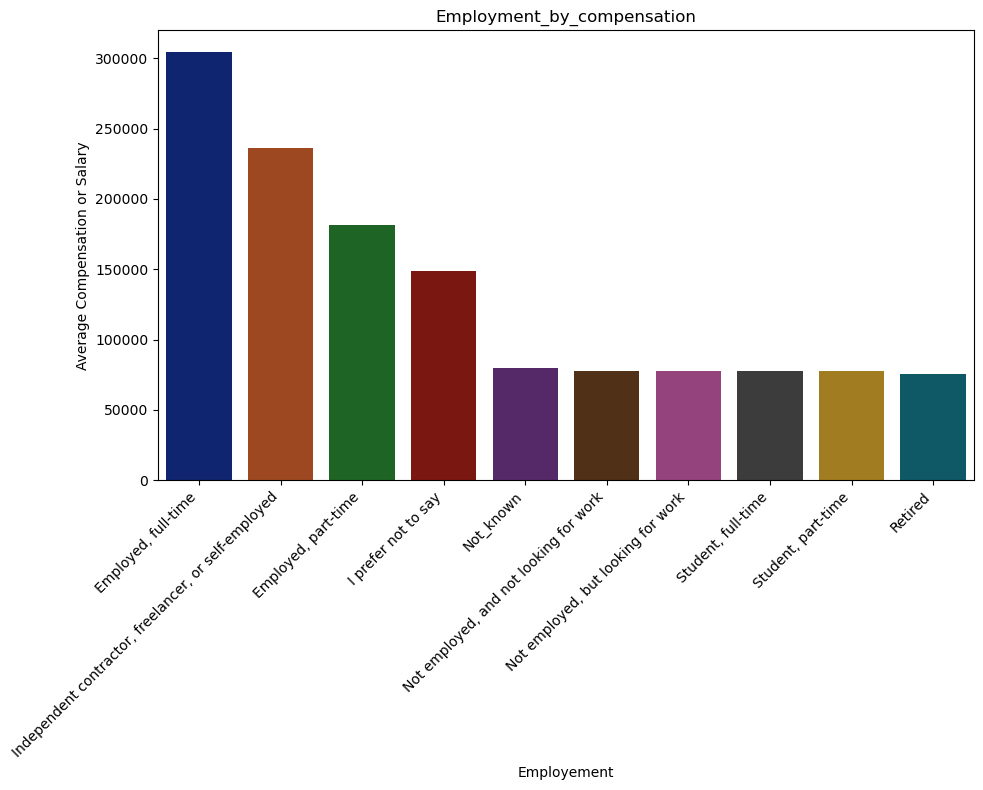

In [125]:
#plot the barchart
plt.figure(figsize = (10,8))
sns.barplot(x = Employment_by_compensation.index, y = Employment_by_compensation.values, palette = 'dark')
plt.title('Employment_by_compensation')
plt.xlabel('Employement')
plt.ylabel('Average Compensation or Salary')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [126]:
Remotework_by_Compensation = survey_df.groupby('RemoteWork')['CompTotal'].mean()
print(Remotework_by_Compensation)

RemoteWork
Full in-person                          338040.876338
Fully remote                            205795.371693
Hybrid (some remote, some in-person)    264307.722073
Name: CompTotal, dtype: float64


The average compensation for fully in-person work is 338,040.88, while fully remote work offers an average compensation of  205,795.37. Hybrid work, which combines remote and in-person elements, falls in between with an average compensation of 264,307.72. In summary, fully in-person work tends to have the highest average compensation, followed by hybrid, and then fully remote work.

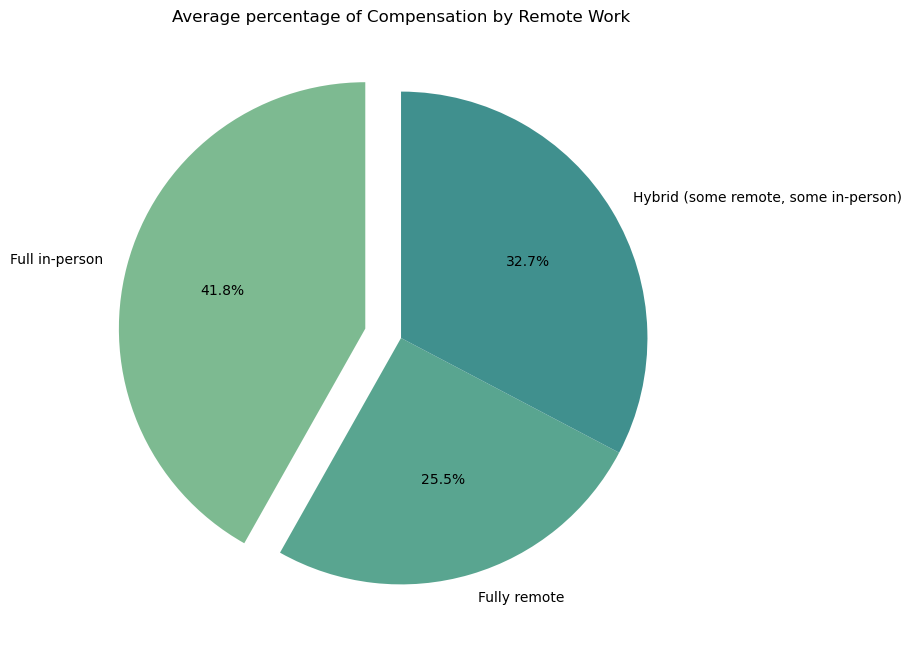

In [127]:
labels = Remotework_by_Compensation.index
sizes = Remotework_by_Compensation.values
explode = (0.15,0,0)
#create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode = explode, colors=sns.color_palette('crest'))
plt.title('Average percentage of Compensation by Remote Work')

# Show the plot
plt.show()

In [128]:
Organisation_size_by_Compensation = survey_df.groupby('OrgSize')['CompTotal'].mean()
print(Organisation_size_by_Compensation)

OrgSize
1,000 to 4,999 employees                              317128.712343
10 to 19 employees                                    328907.014114
10,000 or more employees                              362622.615862
100 to 499 employees                                  326376.684788
2 to 9 employees                                      265719.599550
20 to 99 employees                                    312114.919752
5,000 to 9,999 employees                              345516.245774
500 to 999 employees                                  322218.023320
I don’t know                                           84362.555972
Just me - I am a freelancer, sole proprietor, etc.    181253.823169
Name: CompTotal, dtype: float64


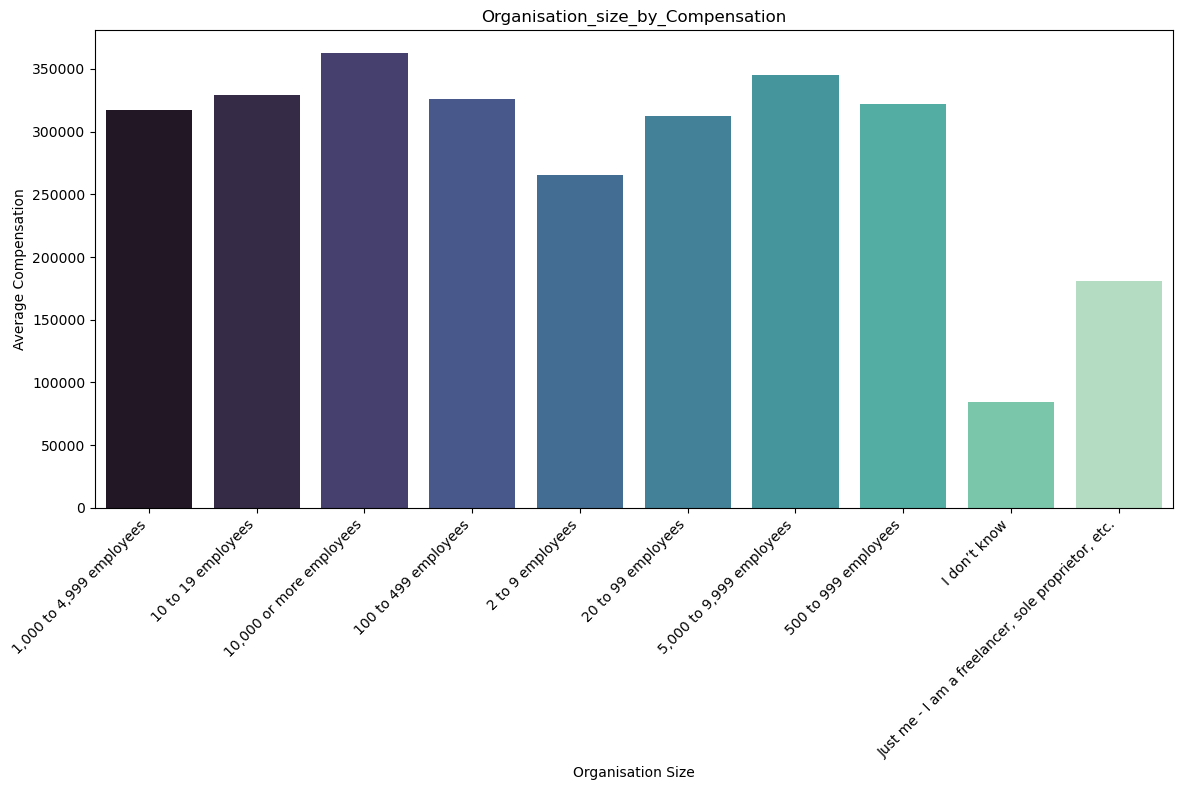

In [129]:
plt.figure(figsize = (12,8))
sns.barplot(x = Organisation_size_by_Compensation.index, y= Organisation_size_by_Compensation.values, palette = 'mako')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Organisation_size_by_Compensation')
plt.xlabel('Organisation Size')
plt.ylabel('Average Compensation')
plt.tight_layout()
plt.show()

Big organizations with more than 10,000 employees tend to pay more than average compensation to developers.
This finding suggests a correlation between organizational size and compensation levels. 

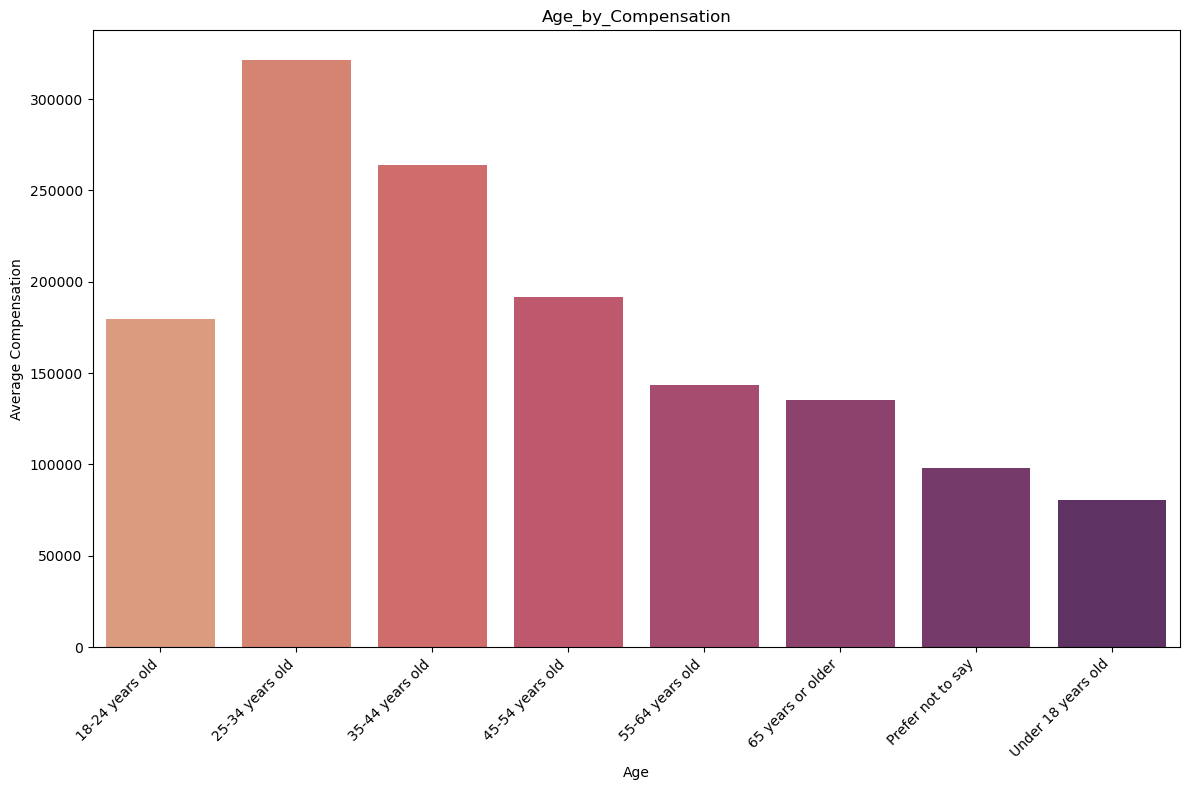

In [130]:
Age_by_Compensation = survey_df.groupby('Age')['CompTotal'].mean()
plt.figure(figsize = (12,8))
sns.barplot(x = Age_by_Compensation.index, y= Age_by_Compensation.values, palette = 'flare')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Age_by_Compensation')
plt.xlabel('Age')
plt.ylabel('Average Compensation')
plt.tight_layout()
plt.show()

While younger developers dominate the field, the analysis reveals that developers aged 25-34 have the highest compensation, followed by 35-44, 45-54, and 18-24.
Newcomers with 0-4 years of experience also fall into the high-compensation age group (18-24 years).
This nuanced insight suggests that while younger developers are prevalent, compensation tends to peak in the mid-career age groups.

In [131]:
survey_df['difference_yearscode_and_profeesional'] = survey_df['YearsCode'] - survey_df['YearsCodePro']
survey_df.describe()

,YearsCode,YearsCodePro,CompTotal,difference_yearscode_and_profeesional
count,73268.000000,73268.000000,7.326800e+04,73268.000000
mean,12.403951,10.268727,2.412927e+05,2.135224
std,9.486324,7.072406,9.343760e+05,6.103706
min,1.000000,1.000000,0.000000e+00,-37.596049
25%,5.000000,5.000000,7.200000e+04,-0.268727
50%,10.000000,10.268727,7.750000e+04,2.731273
75%,16.000000,10.268727,8.160000e+04,5.000000
max,50.000000,50.000000,8.000000e+06,47.000000


Insights:
The derived feature provides insights into the transition period from general coding to professional coding. The average transition period is around 2 years, but there is notable variability among developers. Some developers have a negative transition period, suggesting they started their professional careers before gaining general coding experience, while others had a more extended transition period, potentially indicating late entry into professional coding. This feature could be valuable for understanding the diverse career paths and experiences within the developer community.

In [132]:
freq = survey_df.groupby('CompFreq')['CompTotal'].mean()
print(freq)

CompFreq
Monthly     335464.458590
Notknown     78321.485456
Weekly      137972.323404
Yearly      367658.263162
Name: CompTotal, dtype: float64


Insights:
The data highlights significant variations in average compensation across different frequency categories.
Monthly and yearly compensation categories show relatively higher average values, indicating that respondents receiving compensation on a monthly or yearly basis tend to have higher overall compensation.
Respondents with unknown compensation frequency have a lower average compensation, potentially reflecting a lack of clarity or consistency in reporting compensation frequency.
The average compensation for weekly payments falls in between monthly and yearly compensation, suggesting a moderate average for those receiving compensation on a weekly basis.
This breakdown provides insights into the distribution of compensation based on different frequency reporting categories.

In [133]:
result = survey_df.groupby('Age')['YearsCode'].mean()
print(result)

Age
18-24 years old        5.745004
25-34 years old        9.862368
35-44 years old       18.086086
45-54 years old       27.890028
55-64 years old       34.416954
65 years or older     29.645163
Prefer not to say     11.913682
Under 18 years old     4.470858
Name: YearsCode, dtype: float64


- Coding experience generally increases with age, with the highest average experience observed among developers in the 55-64 age group, followed closely by those aged 65 or older.
- The 35-44 and 45-54 age brackets also demonstrate significant coding experience, indicating a seasoned developer base.
- Younger age brackets (18-24 and 25-34) show relatively lower average coding experience, aligning with their earlier career stages.
- Developers preferring not to disclose their age or those under 18 years old have lower average coding experience, potentially due to their younger age or varied experience levels.
- These insights illustrate how coding experience evolves across different age groups within the developer community, showcasing a diverse range of experience levels and career trajectories.

In [134]:
result1 = survey_df.groupby('Age')['YearsCodePro'].mean()
print(result1)

Age
18-24 years old        7.607461
25-34 years old        6.813228
35-44 years old       13.040725
45-54 years old       21.049802
55-64 years old       27.983671
65 years or older     28.043021
Prefer not to say     10.793951
Under 18 years old    10.100736
Name: YearsCodePro, dtype: float64


Insights:
- Similar to overall coding experience, professional coding experience tends to increase with age.
- The highest average professional coding experience is observed among developers in the 55-64 and 65 or older age groups, followed by those in the 45-54 age bracket.
- Younger developers (18-24 and 25-34) exhibit lower average professional coding experience, reflecting their earlier career stages.
- Developers preferring not to disclose their age or those under 18 years old have relatively lower average professional coding experience.
- These insights reveal how professional coding experience evolves across various age groups among developers, indicating a trend of increasing experience with advancing age and career progression.

In [135]:
result2 = survey_df.groupby('Age')['difference_yearscode_and_profeesional'].mean()
print(result2)

Age
18-24 years old      -1.862457
25-34 years old       3.049140
35-44 years old       5.045361
45-54 years old       6.840226
55-64 years old       6.433283
65 years or older     1.602142
Prefer not to say     1.119731
Under 18 years old   -5.629878
Name: difference_yearscode_and_profeesional, dtype: float64


Insights:
- The difference between overall and professional coding experience varies significantly across different age groups.
- Younger developers generally tend to start their professional coding careers before their overall coding journey, possibly indicating early specialization or focused coding activities.
- In contrast, older developers often start their professional coding careers several years after their initial coding experiences, potentially entering the professional realm after gaining more comprehensive coding expertise or transitioning from other career paths.
- These insights demonstrate how the transition from overall coding experience to professional coding varies among different age groups within the developer community.

In [136]:
Average_yearscode_by_Employment = df.groupby('Employment')['YearsCode'].mean()
print(Average_yearscode_by_Employment)

Employment
Employed, full-time                                     13.724061
Employed, part-time                                      9.552621
I prefer not to say                                      8.229432
Independent contractor, freelancer, or self-employed    14.960597
Not employed, and not looking for work                   8.341217
Not employed, but looking for work                       7.299251
Not_known                                               12.211011
Retired                                                 27.447383
Student, full-time                                       5.616539
Student, part-time                                       6.774942
Name: YearsCode, dtype: float64


Insights:
- Individuals employed as independent contractors, freelancers, or self-employed have notably higher average coding experience, followed closely by those employed full-time.
- Retired developers exhibit the highest average coding experience, indicating a wealth of coding expertise acquired over their careers.
- Students, both full-time and part-time, possess lower average coding experience, which aligns with their focus on education while gaining coding skills.
- Those actively seeking employment or not currently employed display moderate to lower average coding experience, potentially reflecting diverse career stages or transitions within the developer community.
- These insights highlight the diverse range of coding experience across different employment categories among developers, showcasing how various career statuses correlate with coding expertise.

In [137]:
Average_yearscodepro_by_Employment_1 = df.groupby('Employment')['YearsCodePro'].mean()
print(Average_yearscodepro_by_Employment_1)

Employment
Employed, full-time                                      9.854881
Employed, part-time                                     10.005056
I prefer not to say                                     10.227723
Independent contractor, freelancer, or self-employed    11.913336
Not employed, and not looking for work                  10.268727
Not employed, but looking for work                      10.268727
Not_known                                               10.230393
Retired                                                 21.167870
Student, full-time                                      10.268727
Student, part-time                                      10.268727
Name: YearsCodePro, dtype: float64


Insights:
- The professional coding experience among various employment categories generally falls within a similar range, averaging between 9 to 11 years.
- Retired developers stand out with significantly higher professional coding experience, reflecting their extensive careers in coding before retirement.
- Across employed, unemployed, and student categories, the average professional coding experience remains relatively consistent, indicating consistent professional skill development despite different employment statuses.
- These insights depict the relatively consistent levels of professional coding experience across different employment categories among developers, suggesting a sustained commitment to skill development irrespective of their current work status.

In [138]:
Remote_work_average_coding_age = survey_df.groupby('RemoteWork')['YearsCode'].mean()
print(Remote_work_average_coding_age)

RemoteWork
Full in-person                          11.359065
Fully remote                            11.872689
Hybrid (some remote, some in-person)    13.604820
Name: YearsCode, dtype: float64


Insights:
- Developers in a hybrid work environment, blending both remote and in-person elements, possess the highest average coding experience. This might indicate a trend where individuals with more experience or seniority have the flexibility to adopt a hybrid work style.
- While there's a slight difference, both fully remote and in-person work settings show relatively similar average coding experiences, suggesting that coding expertise isn't significantly influenced by the work environment's remote status.
- This data suggests that developers in hybrid work environments tend to have slightly more coding experience, potentially indicating that seasoned professionals might have the flexibility to choose such work setups.

In [139]:
Remote_work_average_procoding_age = survey_df.groupby('RemoteWork')['YearsCodePro'].mean()
print(Remote_work_average_procoding_age)

RemoteWork
Full in-person                           8.850687
Fully remote                            10.775575
Hybrid (some remote, some in-person)     9.952690
Name: YearsCodePro, dtype: float64


Insights:
- Developers working fully remotely show the highest average professional coding experience, suggesting that a fully remote work setting might attract individuals with more professional coding expertise.
- In-person work environments have slightly lower average professional coding experience compared to fully remote settings, indicating a potential trend where remote work might attract more seasoned professionals.
- Hybrid work environments, while balancing remote and in-person elements, also showcase a relatively high average professional coding experience.
- This data demonstrates a nuanced relationship between remote work preferences and professional coding experience among developers, highlighting how different work environments may attract varying levels of professional expertise.

In [140]:
edlevel_pro_years = survey_df.groupby('EdLevel')['YearsCodePro'].mean()
print(edlevel_pro_years)

EdLevel
Associate degree (A.A., A.S., etc.)                                                   10.422818
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                           9.480745
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       10.846243
Other doctoral degree (Ph.D., Ed.D., etc.)                                            13.438659
Primary/elementary school                                                             10.058768
Professional degree (JD, MD, etc.)                                                    11.705676
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.103982
Some college/university study without earning a degree                                11.162872
Something else                                                                        10.073461
Name: YearsCodePro, dtype: float64


Insights:
- Other doctoral degree holders, such as Ph.D. or Ed.D., show the highest average professional coding experience among educational categories, indicating a significant correlation between higher academic achievements and coding experience.
- Master's degree holders follow closely, displaying a notably high average professional coding experience.
- While individuals with Bachelor's degrees have a lower average professional coding experience, they form a substantial part of the developer community.
- This data highlights how varying educational backgrounds align with different levels of professional coding experience among developers. Higher academic degrees, especially other doctoral degrees, show a strong correlation with increased professional coding expertise.

In [141]:
edlevel_overall_years = survey_df.groupby('EdLevel')['YearsCode'].mean()
print(edlevel_overall_years)

EdLevel
Associate degree (A.A., A.S., etc.)                                                   12.078913
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          12.103065
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15.200716
Other doctoral degree (Ph.D., Ed.D., etc.)                                            20.342654
Primary/elementary school                                                              6.200335
Professional degree (JD, MD, etc.)                                                    14.848302
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7.572165
Some college/university study without earning a degree                                12.456401
Something else                                                                        10.865764
Name: YearsCode, dtype: float64


Insights:
- Other doctoral degree holders, such as Ph.D. or Ed.D., present the highest average coding experience, indicating a strong correlation between higher academic achievements and coding expertise.
- Master's degree holders also showcase a notably high average coding experience.
- Conversely, individuals with educational backgrounds limited to primary/elementary or secondary school exhibit lower average coding experience.
- These insights illustrate the relationship between educational achievements and the level of coding experience among developers, emphasizing the significance of higher academic degrees in fostering extensive coding expertise.

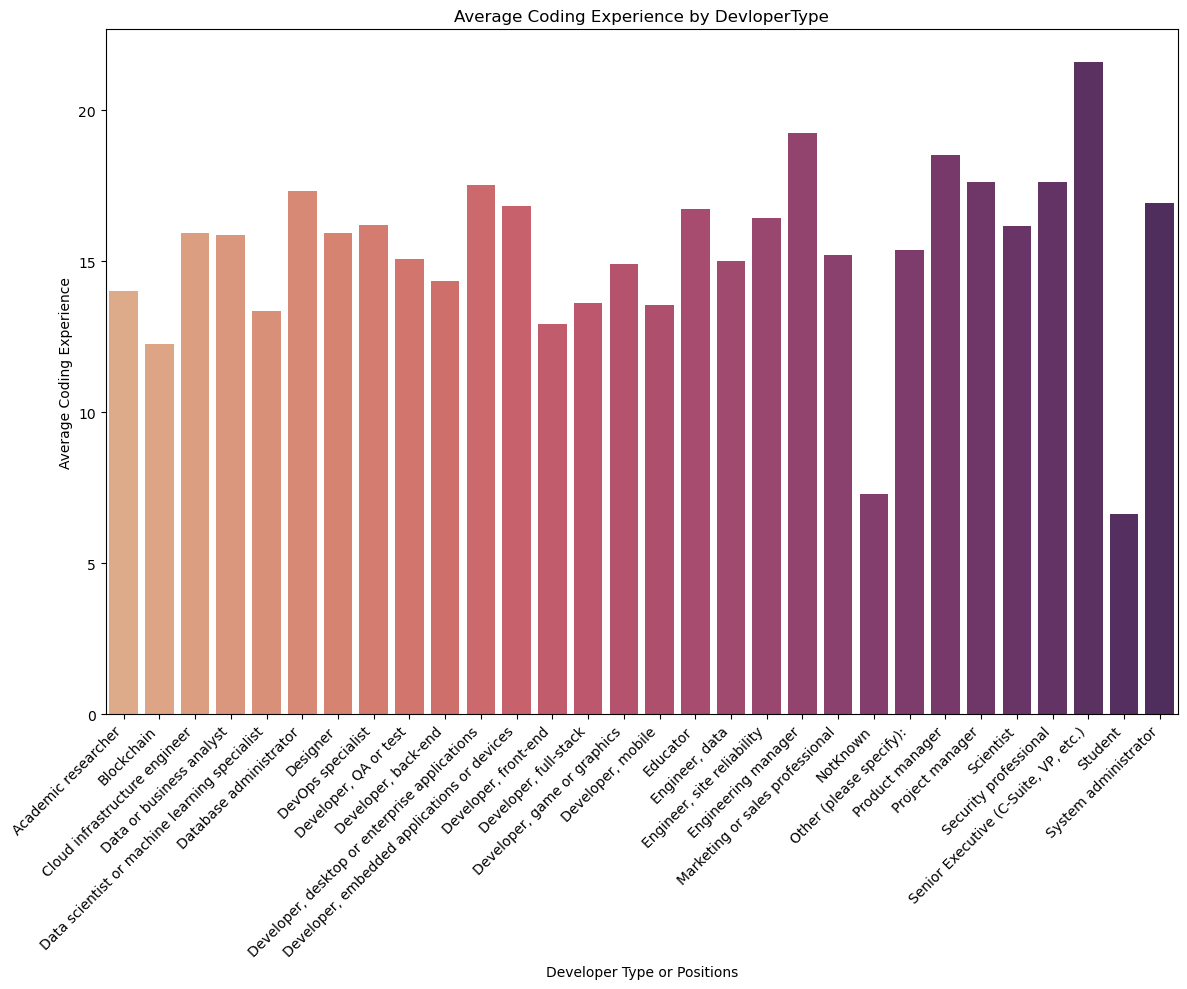

In [142]:
Dev_type = new_df.groupby('DevType')['YearsCode'].mean()
#plot into bargraph
plt.figure(figsize = (12,10))
sns.barplot(x = Dev_type.index, y = Dev_type.values, palette = 'flare')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Average Coding Experience by DevloperType')
plt.xlabel('Developer Type or Positions')
plt.ylabel('Average Coding Experience')
plt.tight_layout()
plt.show()

###### Specialized Roles Command Experience:

Positions such as Database Administrators, Developer of Desktop or Enterprise Applications, and Developer of Embedded Applications or Devices require specialized skills, leading to higher average coding experience.
###### Diverse Experience Spectrum:

The coding experience varies significantly among different developer roles, indicating the diverse skill sets and backgrounds required across the tech industry.
###### Managerial Positions Reflect Technical Depth:

Senior roles like Engineering Managers and Senior Executives (C-Suite, VP, etc.) exhibit extensive coding experience, highlighting the technical depth necessary even in managerial positions.
###### Newer Technologies Influence Experience:

Roles focusing on newer technologies like Data Science, Machine Learning, Front-end, Mobile, and Game/Graphics tend to have lower average coding experience, reflecting the evolving nature of these fields.
###### Education Stage Affects Coding Experience:

Students naturally exhibit the least coding experience, aligning with their stage in education and career development.
Diversity in Technical Proficiencies:

DevOps Specialists, System Administrators, Data or Business Analysts, and Project Managers demonstrate moderate coding experience, showcasing a diverse range of technical proficiencies required in these roles.
Understanding the varied levels of coding experience across different developer roles emphasizes the multifaceted nature of the technology industry. It showcases how certain roles demand extensive technical expertise while others may focus more on specialized domains or managerial capabilities.

##### Bivariate Analysis Insights on the basis of compensation:
1. Developer Types and Compensation:
- Engineering Manager has the highest average compensation, followed by roles like Engineer, site reliability, and Blockchain.
- Student has the lowest average compensation among the listed developer types.
- Roles such as Product Manager, Senior Executive (C-Suite, VP, etc.), and Cloud Infrastructure Engineer also have relatively high average compensations.
- NotKnown and Academic Researcher seem to have lower average compensations compared to many other roles.
These observations provide a general overview, but further analysis considering factors like experience, location, and job nature within each category is necessary for more precise conclusions.
2. Education Level and Compensation:
- Professional degree (JD, MD, etc.) has the highest average compensation, followed by Bachelor’s degree.
- Other doctoral degree (Ph.D., Ed.D., etc.) has a lower average compensation compared to professional degrees but is higher than the average compensation for master's and bachelor's degrees.
- Master’s degree comes next in terms of average compensation, followed by Some college/university study without earning a degree.
- Individuals with an Associate degree have a lower average compensation compared to higher degrees but still higher than some other categories.
- Secondary school and Primary/elementary school education levels have relatively lower average compensations.
- Something else and Other categories have lower average compensations, indicating diverse educational backgrounds with varying compensation levels.
3. Remote Work and Compensation:
- Fully in-person work tends to have the highest average compensation, followed by hybrid, and then fully remote work.
- The average compensation for fully in-person work is 338,040.88, fully remote work offers 205,795.37, and hybrid work falls in between with 264,307.72 on average.
This insight highlights the compensation differences associated with different work arrangements.
4. Organization Size and Compensation:
- Big organizations with more than 10,000 employees tend to pay more than average compensation to developers.
- This finding suggests a correlation between organizational size and compensation levels.
5. Age Group and Compensation:
- While younger developers dominate the field, the analysis reveals that developers aged 25-34 have the highest compensation, followed by 35-44, 45-54, and 18-24.
- Newcomers with 0-4 years of experience also fall into the high-compensation age group (18-24 years).
This nuanced insight suggests that while younger developers are prevalent, compensation tends to peak in the mid-career age groups.
##### Conclusion:
The bivariate analysis provides valuable insights into the factors influencing developer compensation. Engineering Managers, specific developer types, and those with professional degrees tend to have higher compensations. Educational levels correlate with compensation, emphasizing the value of higher degrees. The nature of work, whether fully in-person, fully remote, or hybrid, significantly impacts compensation. Larger organizations also demonstrate a trend of offering higher compensations. Lastly, age groups, with a focus on mid-career developers, show a positive correlation with compensation levels. These findings collectively offer a nuanced understanding, guiding organizational strategies, talent management, and compensation structures within the dynamic landscape of the developer community.

###### Bivariate analysis on the basis of CodingExperience
1. Coding Experience and Developer Roles:
- Specialized Roles Require Extensive Experience: Roles such as Database Administrators, System Administrators, and Engineering Managers demonstrate higher coding experience compared to roles like Data Scientists, Mobile Developers, or Front-end Developers, which might focus on newer technologies and thus require less overall experience.

2. Coding Experience and Education Levels:
- Higher Education Corresponds to More Experience: Professionals with advanced degrees, including other doctoral degrees or master's degrees, generally exhibit greater coding experience. However, individuals with primary/elementary or secondary school education levels also showcase notable coding experience, likely in specialized roles or with extensive practical knowledge.

3. Coding Experience and Employment Status:
- Full-Time Employment Correlates with Increased Experience: Those employed full-time typically show higher coding experience compared to part-time workers or individuals not employed. This aligns with the assumption that consistent work exposure contributes to more extensive coding proficiency.

4. Coding Experience and Remote Work Preferences:
- Experience Levels are Varied Across Remote Work Preferences: Professionals favoring fully in-person work tend to exhibit slightly higher coding experience compared to those favoring fully remote or hybrid work settings. The nature of remote work might impact the exposure to different projects, hence influencing coding experience.

5. Coding Experience Across Age Groups:
- Experience Increases with Age: Older age groups, particularly those in the age range of 45-54 years and 55-64 years, tend to possess more coding experience compared to younger age brackets. This suggests that coding expertise often grows with career longevity.

6. Coding Experience and Developer Types:
- Diverse Experience Spectrum Across Developer Types: Developer roles requiring specialized skills or extensive technical knowledge, such as Database Administrators or Developers of Desktop or Enterprise Applications, tend to demonstrate higher coding experience compared to roles focusing on newer technologies or specific domains.

Understanding how coding experience interacts with various factors like education, employment, remote work, age, and specific developer roles provides valuable insights into the dynamics of skill acquisition, career progression, and the evolving nature of technology-driven professions.

### SOME OF QUESTIONS AND ANSWERS ON THE BASIS OF ABOVE DISCUSSION
##### Companies Paying Developers the Most:

- The analysis doesn’t directly specify companies but indicates that certain roles like Engineering Managers and specialized roles in cloud infrastructure or data analysis tend to command higher compensations. These roles might often be associated with larger tech firms or companies offering specialized services.
#### Significance of Remote Work for Developers:

- Fully in-person work tends to correlate with higher compensation compared to remote or hybrid work setups. However, the impact varies based on individual preferences and the nature of the job. While remote work offers flexibility, it doesn't consistently align with the highest compensation.
##### Coding Experience and Pay Levels:

- Coding experience correlates positively with compensation up to a certain extent. While a substantial portion falls within a certain compensation range (72,000 to 81,600), outliers command significantly higher incomes, implying that extensive coding experience can lead to higher pay, though exceptions exist.
#### Popular Learning Methods for Coding:

- The analysis doesn’t directly address this aspect, but insights suggest that developers often engage in coding as a hobby, implying self-learning or interest-driven practice. Additionally, specialized roles might require continuous learning through courses, workshops, or online platforms to stay updated.
##### Employment Chances After Masters Degrees:

- Professionals with advanced degrees, particularly master's degrees, tend to exhibit higher coding experience. While the direct impact on job opportunities isn't explicitly discussed, the analysis indicates a correlation between higher education levels and coding proficiency, which could positively impact job prospects.

# Insights Report: Exploring Coding Experience and Associated Variables
### Coding Experience Insights
##### Coding Experience Distribution:

The distribution of coding experience among developers reveals a diverse range, from novice to highly experienced individuals, showcasing the dynamic nature of the developer community.
#### Concentration of Experience:

A substantial cohort of professionals falls within the 5 to 16 years of coding experience range, indicating a significant segment of seasoned practitioners.
#### Variation in Compensation:

Compensation varies widely within the developer community, with a concentration around 72,000 to 81,600, yet notable outliers command higher incomes exceeding the six-figure mark.
### Factors Impacting Coding Experience
#### Roles and Expertise:

Roles demanding specialized skills or extensive technical knowledge tend to exhibit higher coding experience compared to those focused on emerging technologies.
#### Education and Experience Correlation:

Professionals with advanced degrees generally showcase greater coding experience, though notable proficiency is observed among individuals with varied educational backgrounds.
#### Employment and Remote Work Impact:

Full-time employment correlates with higher coding experience. Professionals favoring fully in-person work tend to have slightly more experience than those preferring remote or hybrid work settings.
#### Age Groups and Expertise:

Older age groups, particularly those aged 45-64, possess more coding experience compared to younger cohorts, indicating a correlation between career longevity and expertise.
### Insights Across Developer Types
#### Role-Based Experience:
Roles like Database Administrators or Engineering Managers typically display higher coding experience than roles focused on newer technologies or specific domains.
##### Conclusion
The analysis illustrates the multifaceted landscape of coding experience within the developer community. It emphasizes the correlation between experience levels and various factors such as education, employment status, preferred work environments, age, and specific developer roles. Understanding these relationships is crucial for talent recruitment, career development strategies, and creating a dynamic and inclusive ecosystem within the technology industry.



### Be ready for 2023 stackoverflow survey Analysis

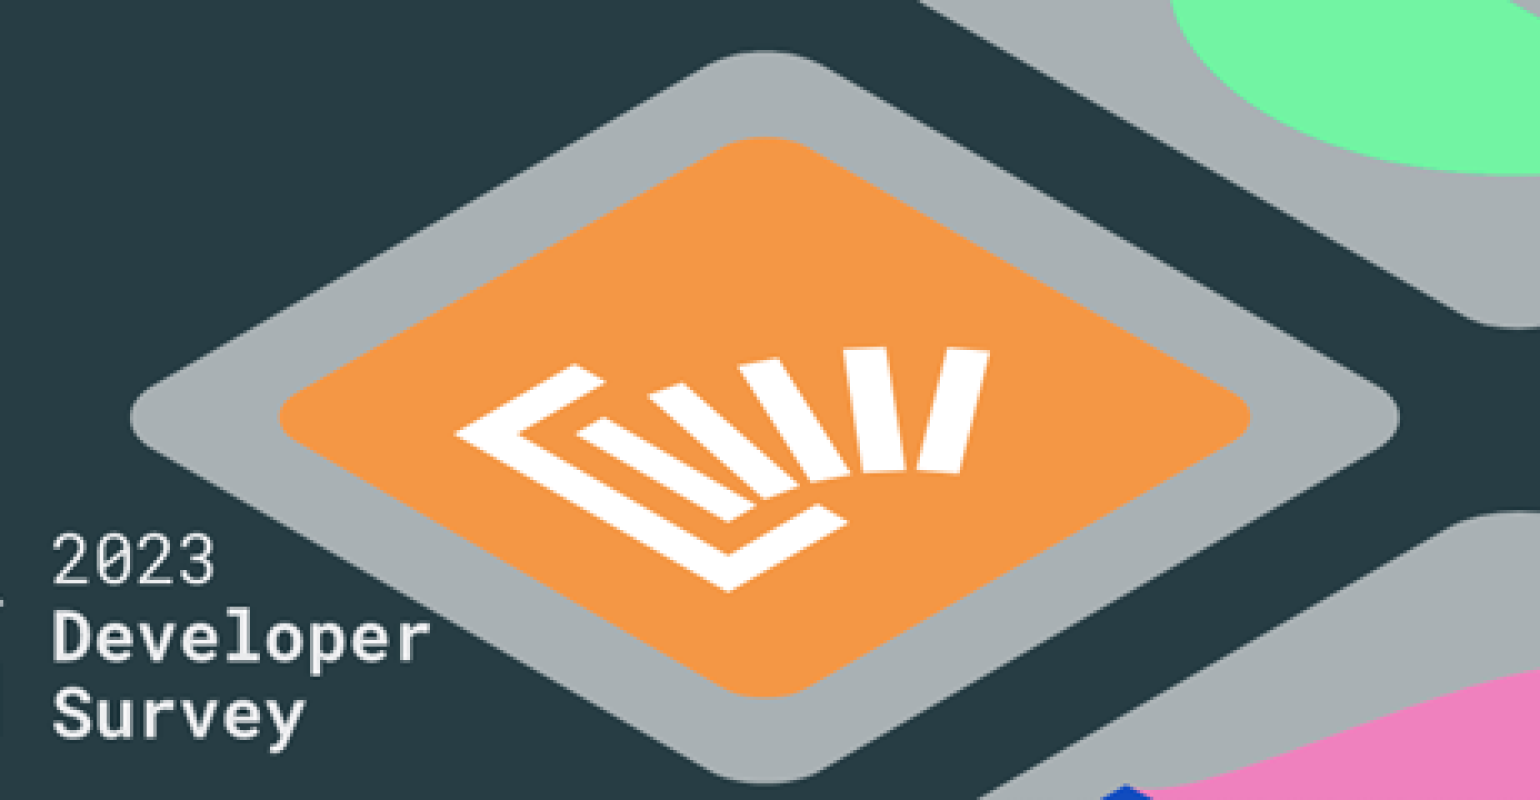